# Homework 1: Dataset Wine quality

In [29]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import skew

In [130]:
# Defining palette

colors = ["#9467bd", "#057476", "#FF7A00", "#ff0051", "#ffe100", "#00f2ff", "#bd6767"]
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

In [5]:
# Reading the dataset
df_r = pd.read_csv('../data/winequality-red.csv', delimiter=";")
df_w = pd.read_csv('../data/winequality-white.csv', delimiter=";")

In [6]:
df_r.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [7]:
df_w.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [8]:
df_r.describe(include='all')

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [9]:
df_w.describe(include='all')

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

1. Number of observations N , number of predictor variables D, number of classes L and class-distribution

In [10]:
def describe_data(df, class_column):
    
    N = df.shape[0]
    D = df.shape[1] - 1
    L = df[class_column].nunique()

    class_distribution = df[class_column].value_counts()

    print(f"Número de observações (N): {N}")
    print(f"Número de variáveis preditoras (D): {D}")
    print(f"Número de classes (L): {L}")
    print(f"Distribuição das classes: {class_distribution}")

In [11]:
describe_data(df_r, 'quality')

Número de observações (N): 1599
Número de variáveis preditoras (D): 11
Número de classes (L): 6
Distribuição das classes: quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


In [12]:
describe_data(df_w, 'quality')

Número de observações (N): 4898
Número de variáveis preditoras (D): 11
Número de classes (L): 7
Distribuição das classes: quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64


2. Unconditional mono-variate analysis of each of the D predictors

In [85]:
def calculate_univariate_statistics(data):

    for i, column in enumerate(data.columns):
        
        mean = data[column].mean()
        std = data[column].std()
        skewness = skew(data[column])
        
        print(f'\n{column}:')
        print(f'Média (µ): {mean:.2f}')
        print(f'Desvio Padrão (σ): {std:.2f}')
        print(f'Assimetria (γ): {skewness:.2f}')

In [70]:
def combined_hist_univariate_analysis(data):

    output_dir = 'figures'

    num_cols = 3
    num_variables = len(data.columns)
    
    num_rows = math.ceil(num_variables / num_cols)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), constrained_layout=True)
    axes = axes.flatten()

    for i, column in enumerate(data.columns):
        col_data = data[column]

        sns.histplot(col_data, kde=True, ax=axes[i], color=colors[i % len(colors)])
        axes[i].set_title(f'Histogram of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.savefig(f'{output_dir}/combined_hist_univ_analysis.png')
    plt.show()

In [57]:
def combined_box_univariate_analysis(data):

    output_dir = 'figures'

    num_cols = 3
    num_variables = len(data.columns)
    
    num_rows = math.ceil(num_variables / num_cols)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), constrained_layout=True)

    axes = axes.flatten()

    for i, column in enumerate(data.columns):
        col_data = data[column]

        sns.histplot(col_data, kde=True, ax=axes[i], color=colors[i % len(colors)])
        axes[i].set_title(f'Boxplot of {column}')
        axes[i].set_xlabel(column)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.savefig(f'{output_dir}/combined_box_univ_analysis.png')
    plt.show()


In [58]:
def univariate_analysis(data):

    output_dir = 'figures'

    for column in data.columns:  
        
        if column == 'quality':
            continue
        
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        sns.histplot(data[column], kde=True)
        plt.title(f'Histogram of {column}')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(x=data[column])
        plt.title(f'Boxplot of {column}')
        
        plt.tight_layout()
        plt.savefig(f'{output_dir}/univariate_{column}.png')
        plt.show()

Unconditional histograms and box-plots. Unconditional mean µ, standard deviation σ and skewness γ, with d = 1, . . . , D,
using all the N observations

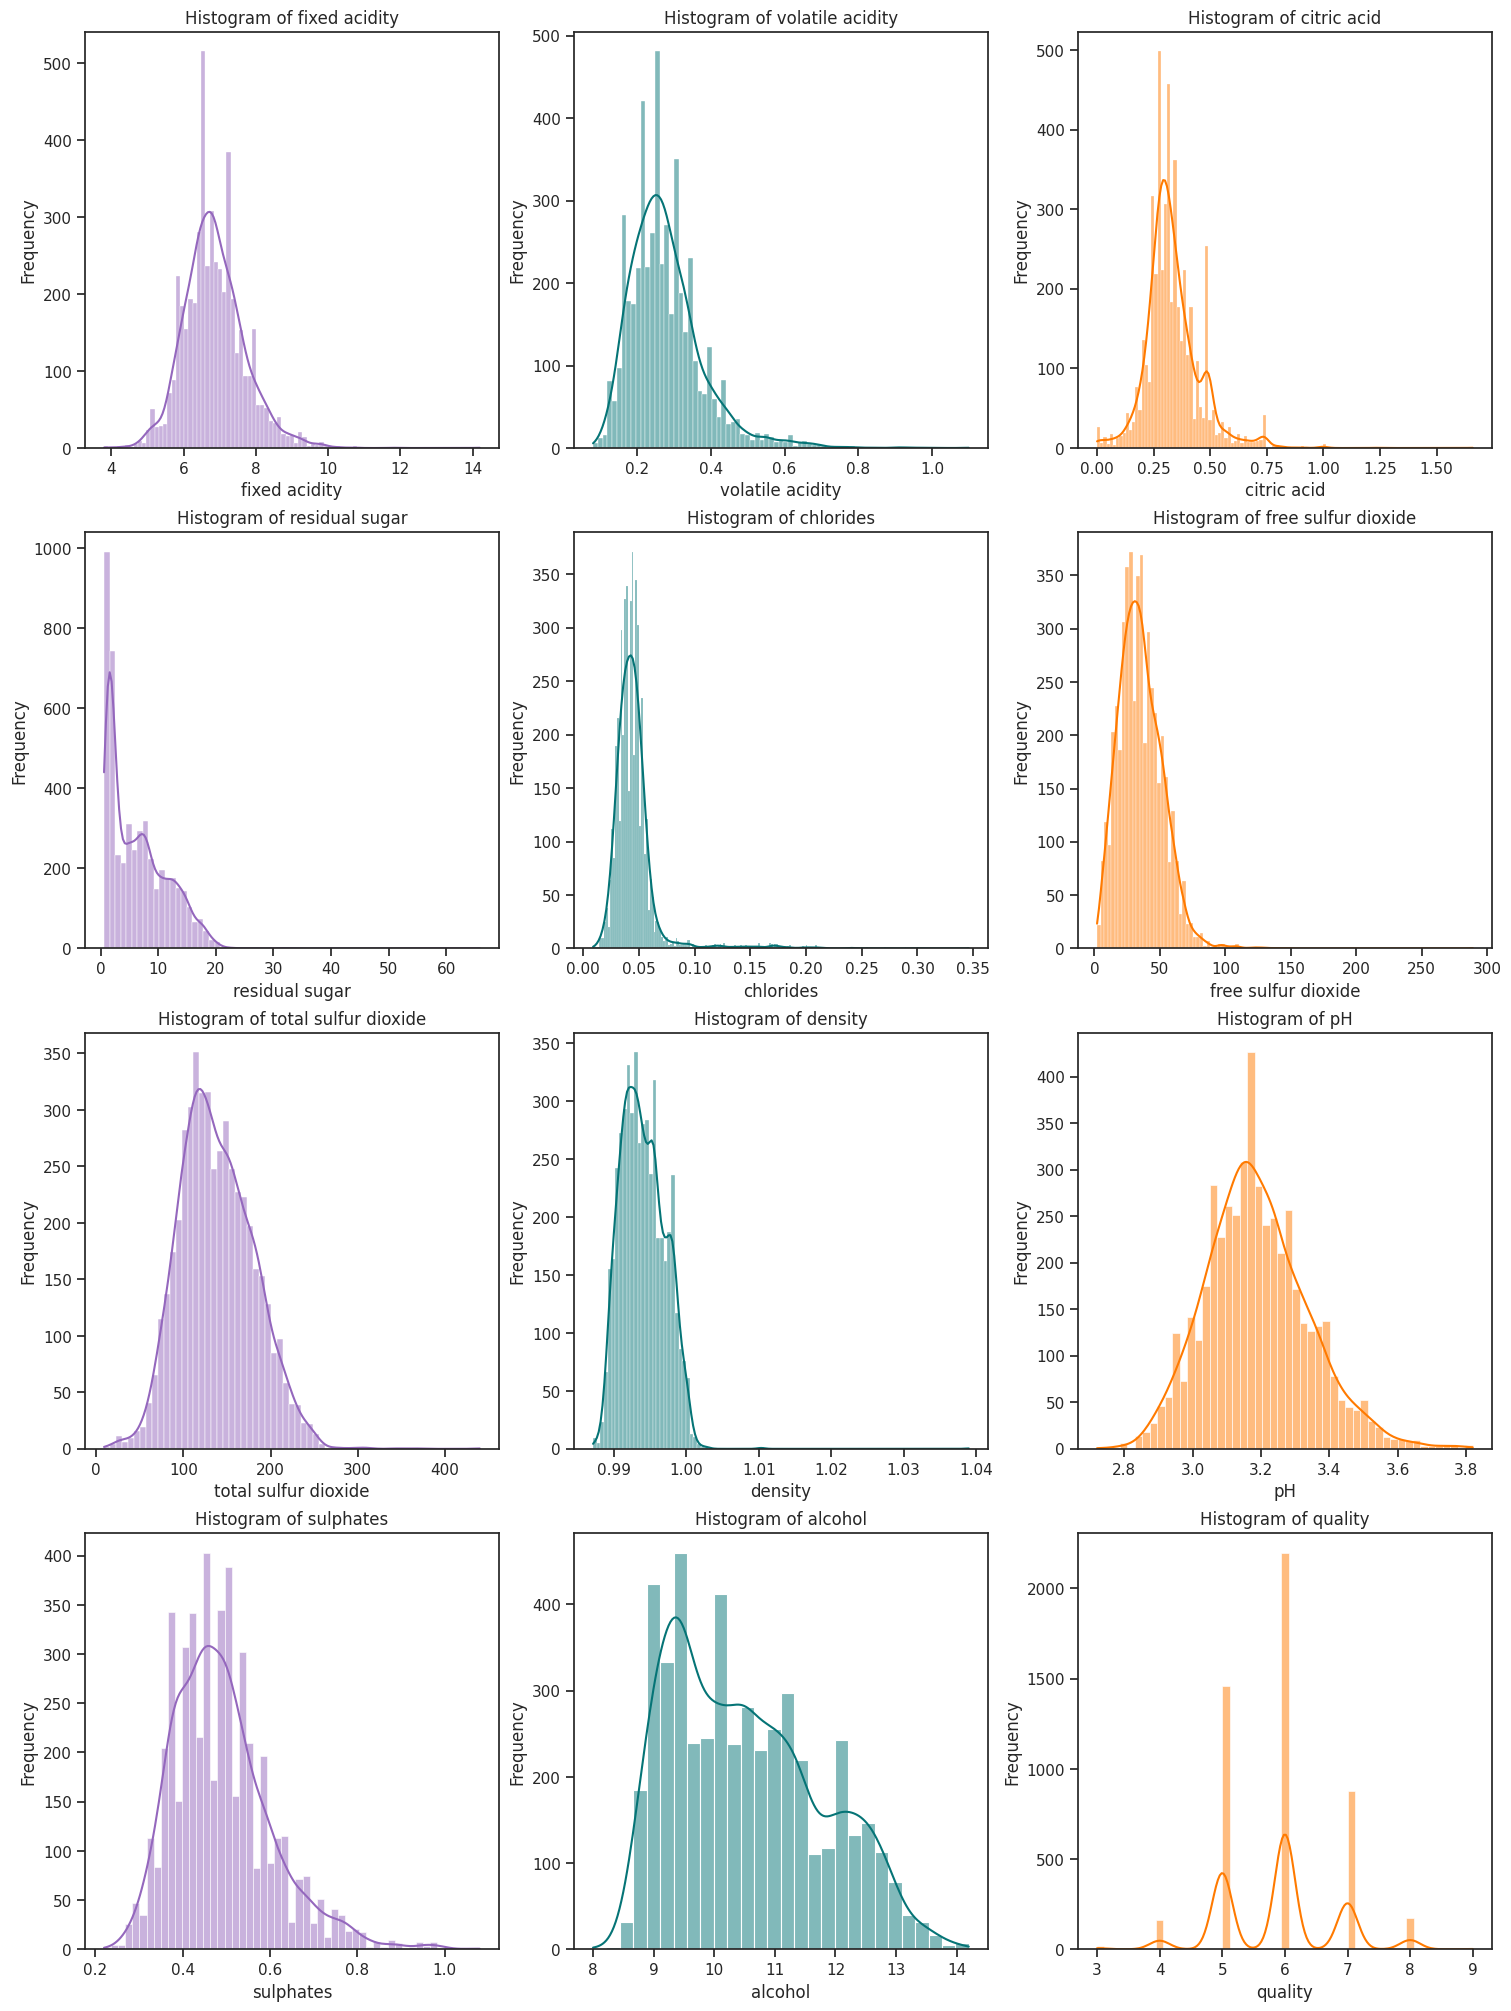

In [71]:
combined_hist_univariate_analysis(df_w)

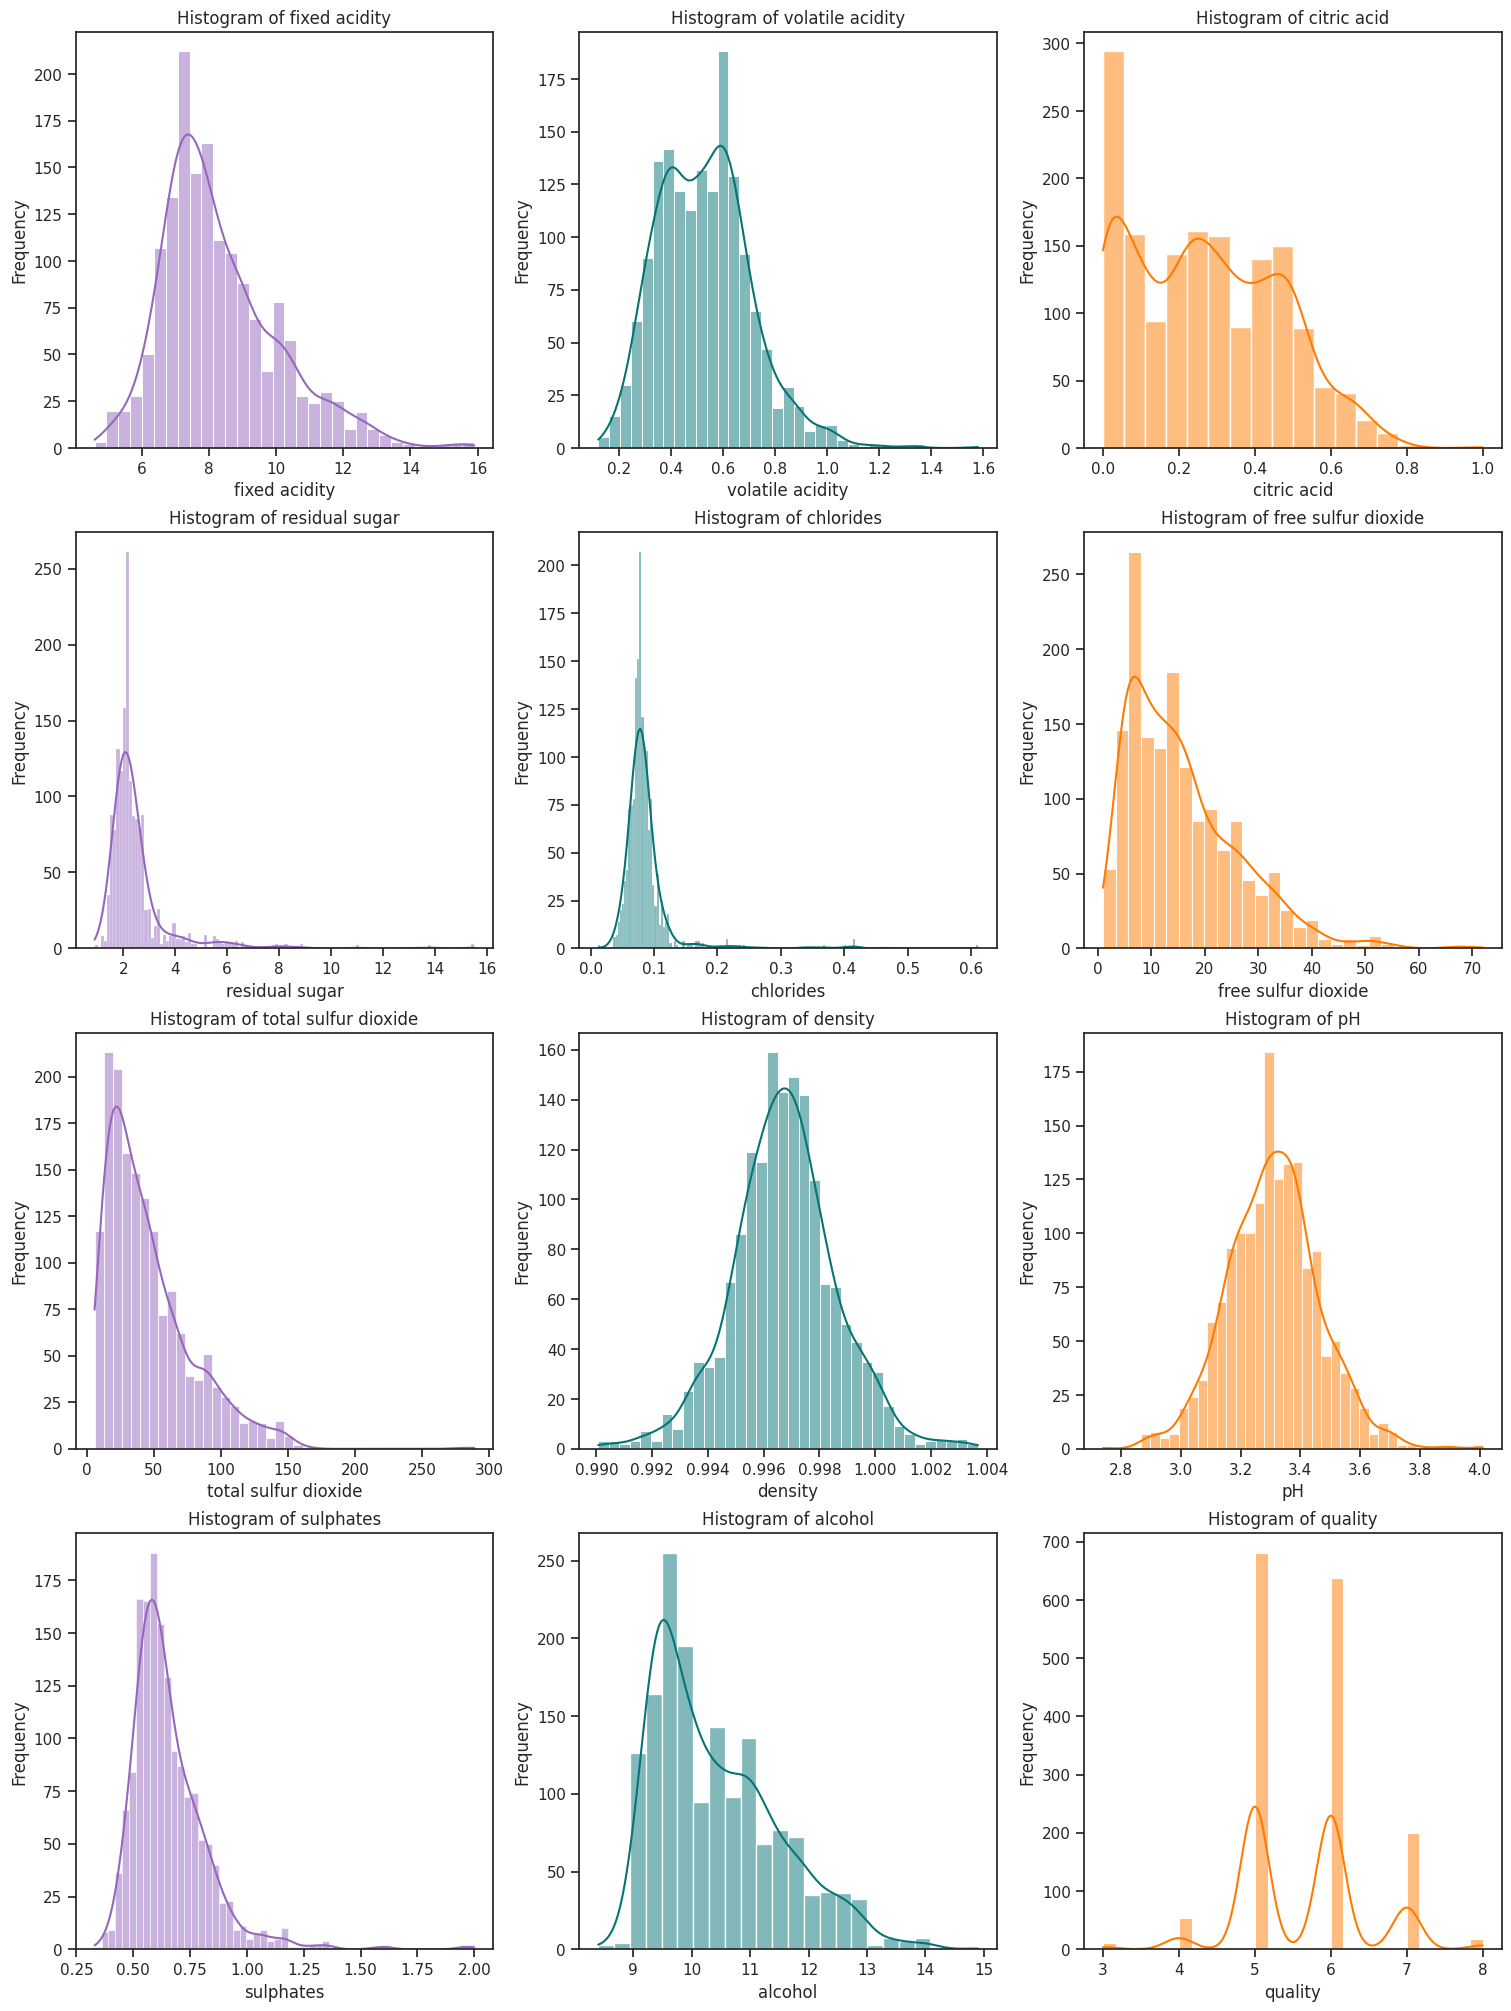

In [72]:
combined_hist_univariate_analysis(df_r)

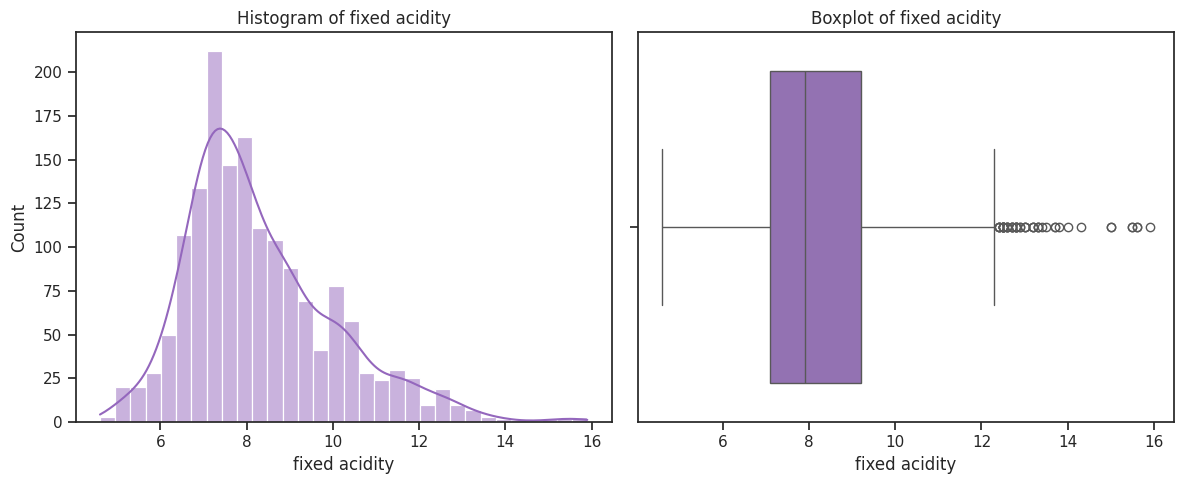

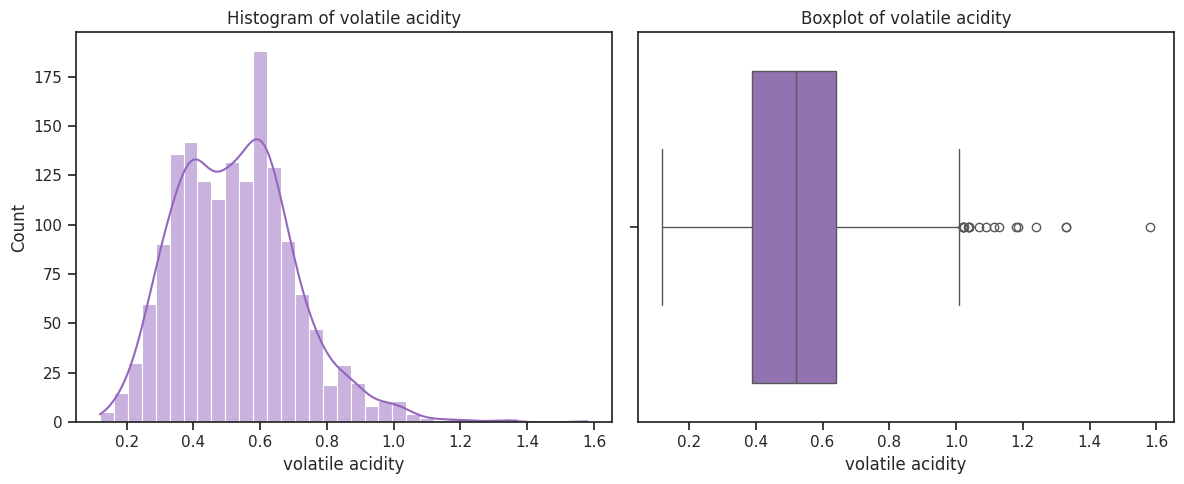

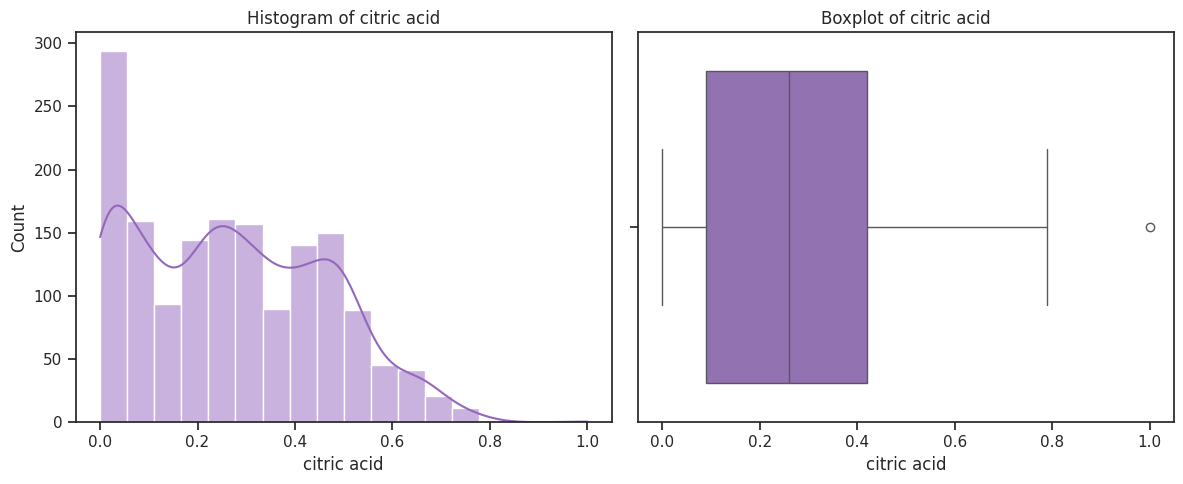

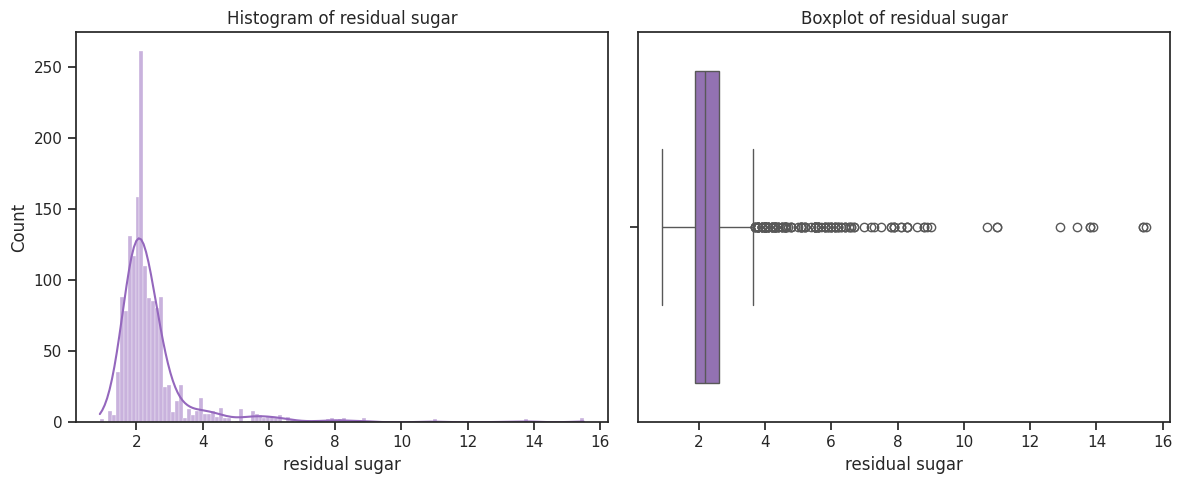

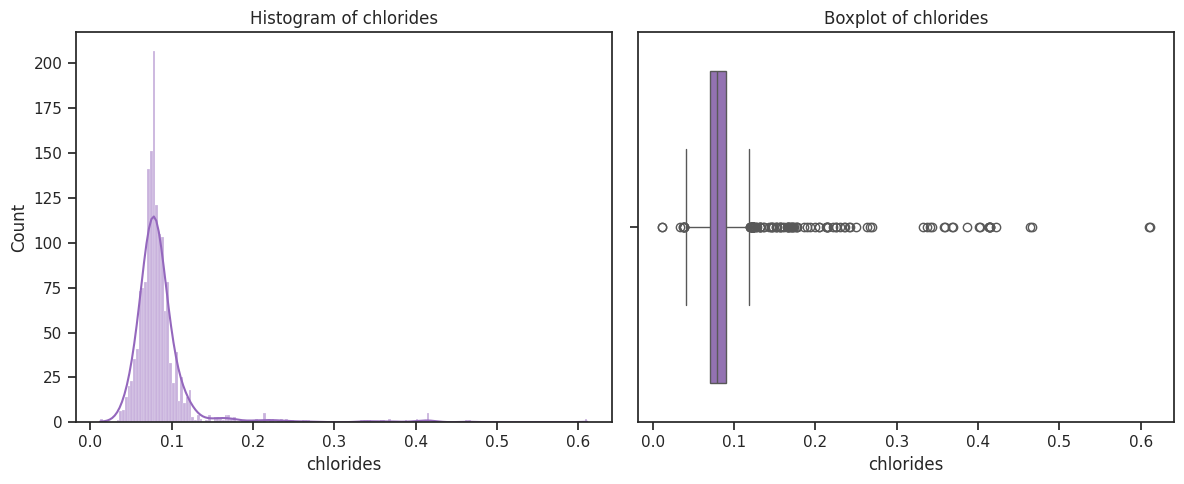

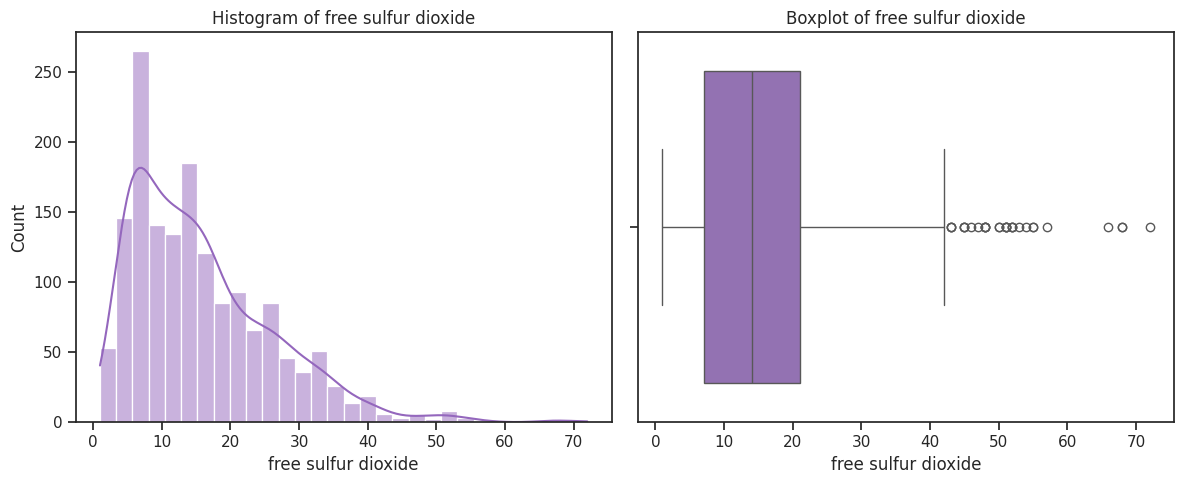

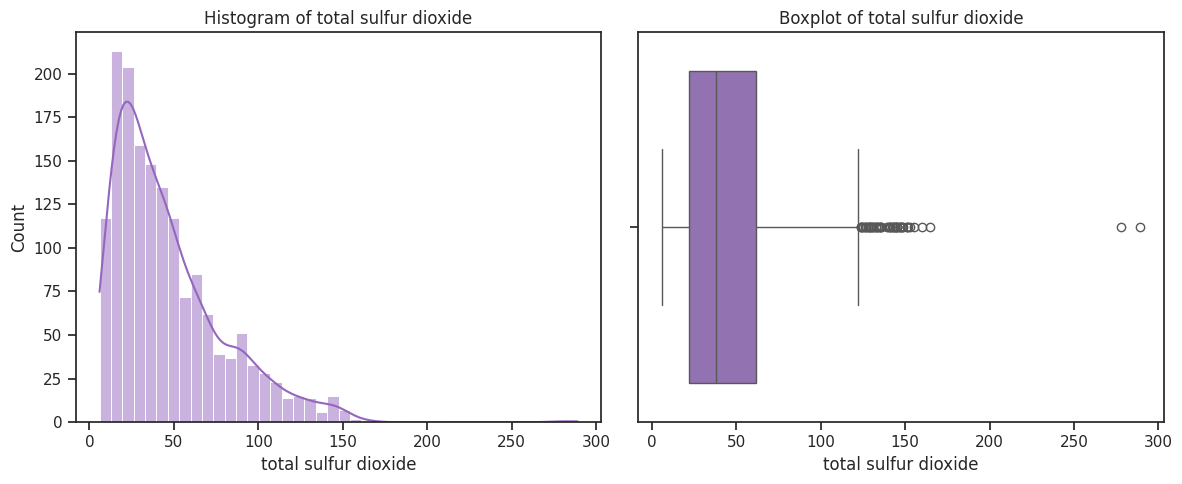

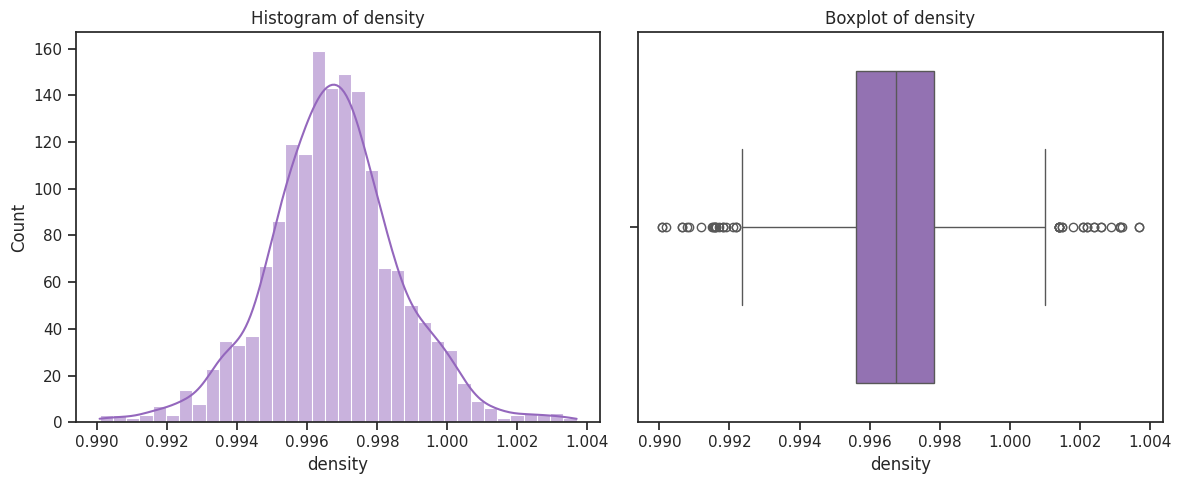

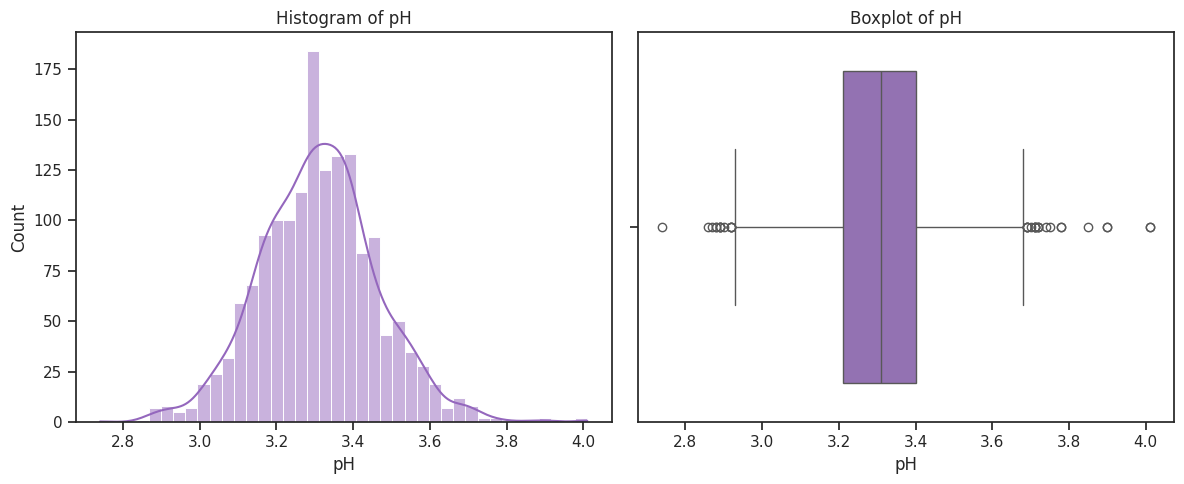

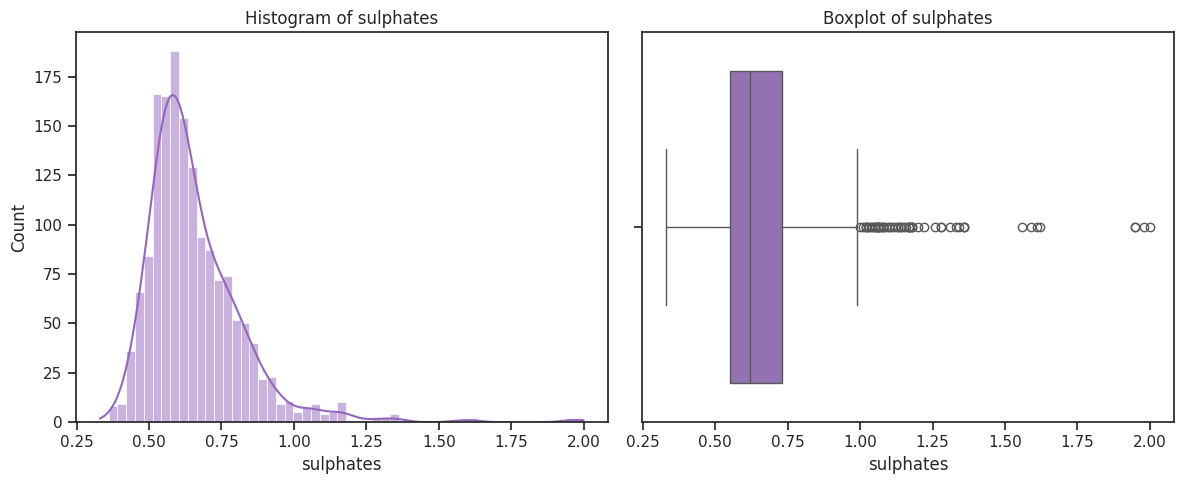

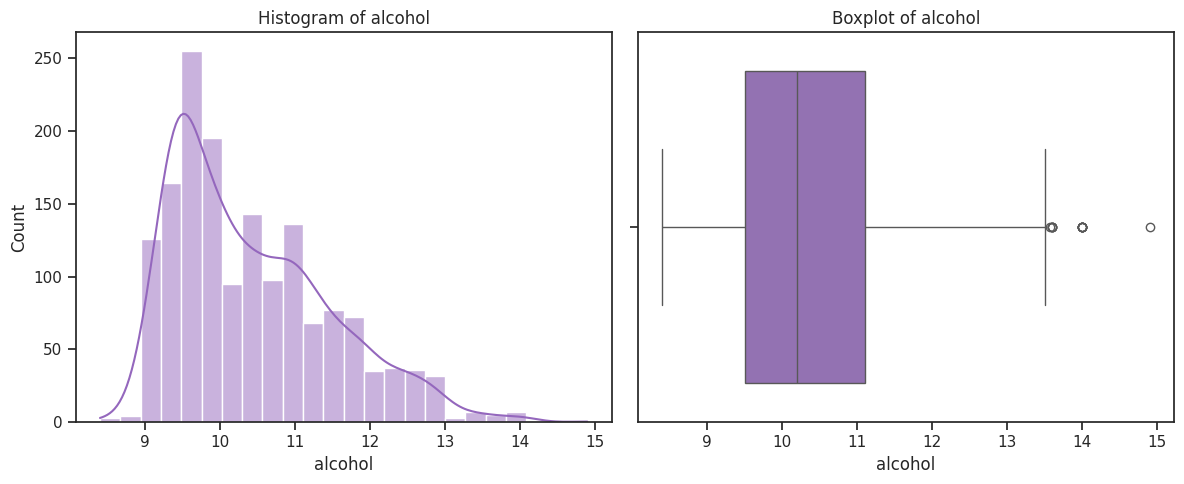

In [63]:
univariate_analysis(df_r)

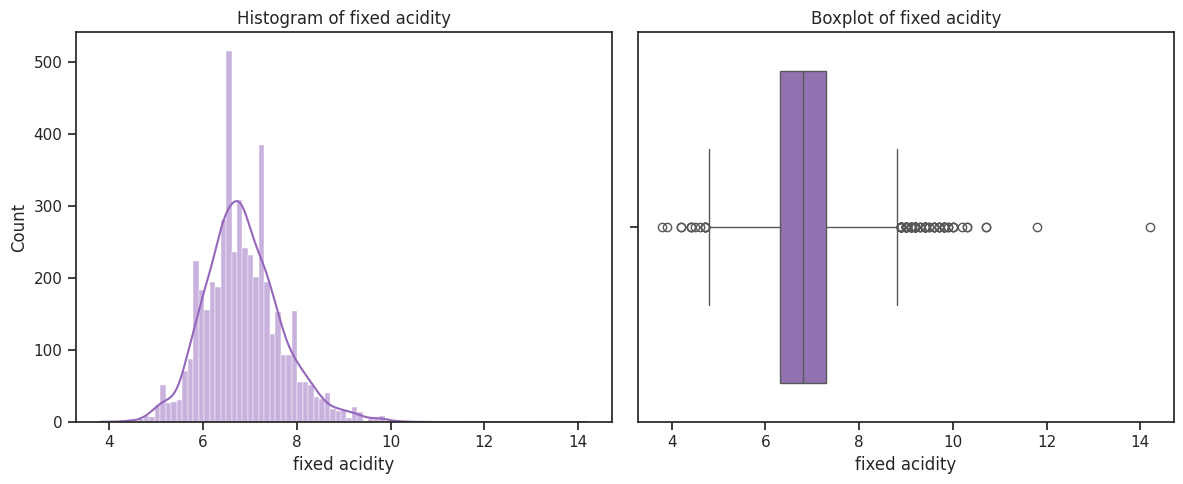

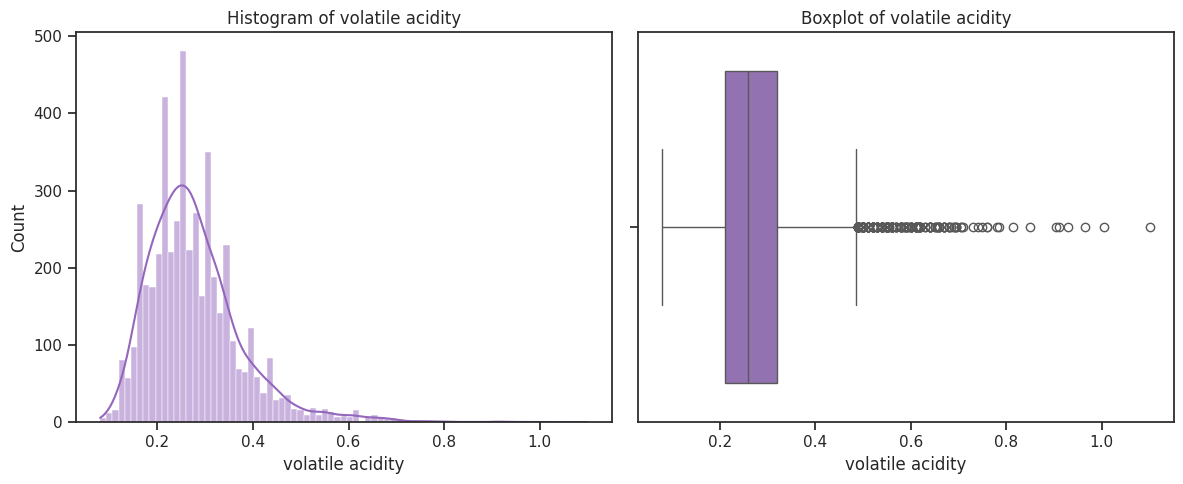

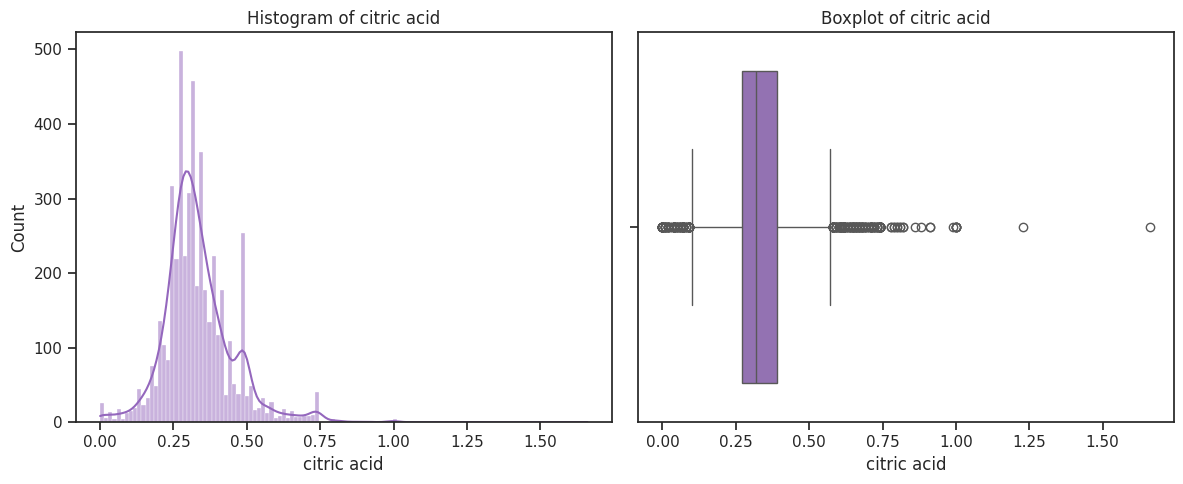

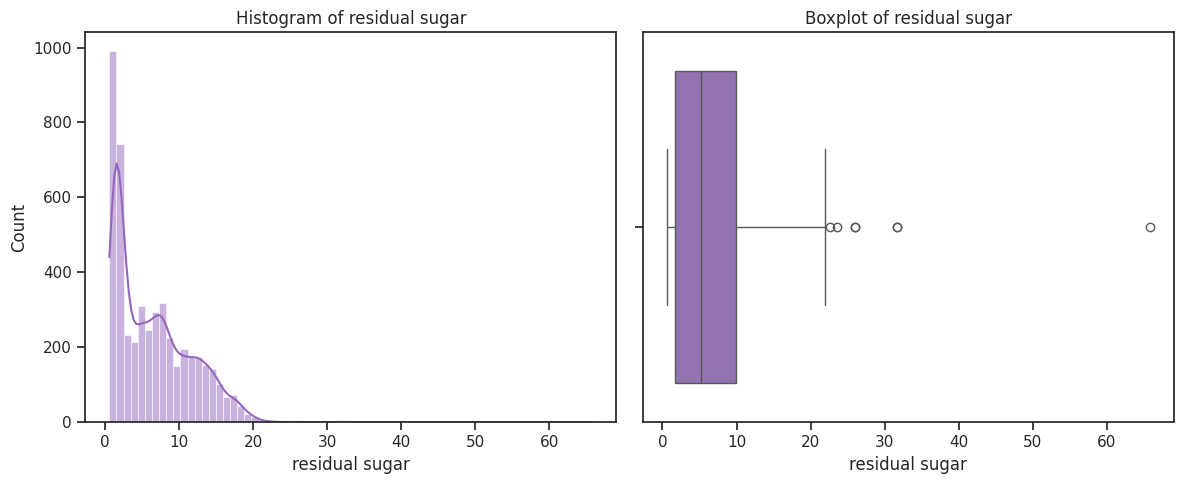

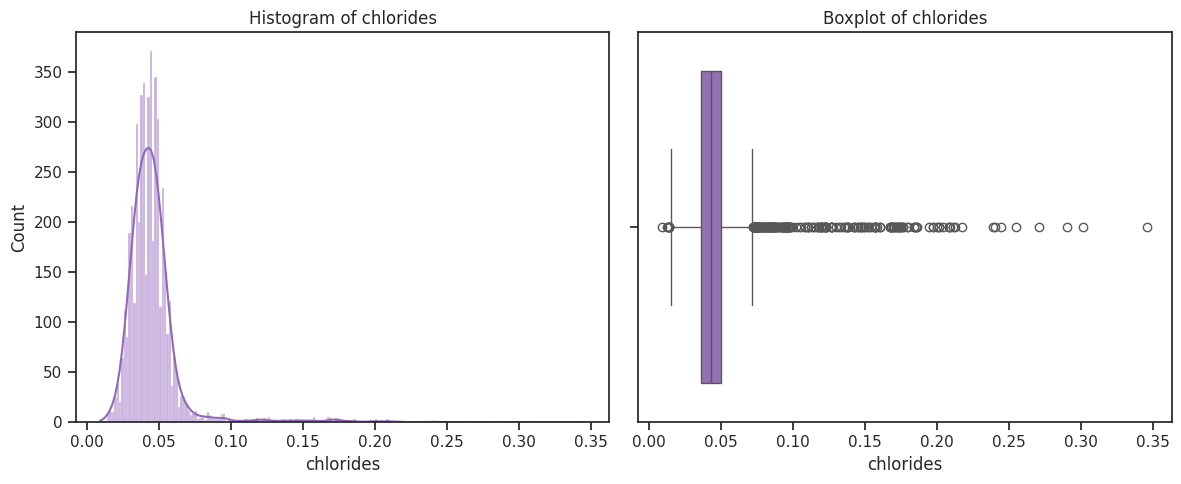

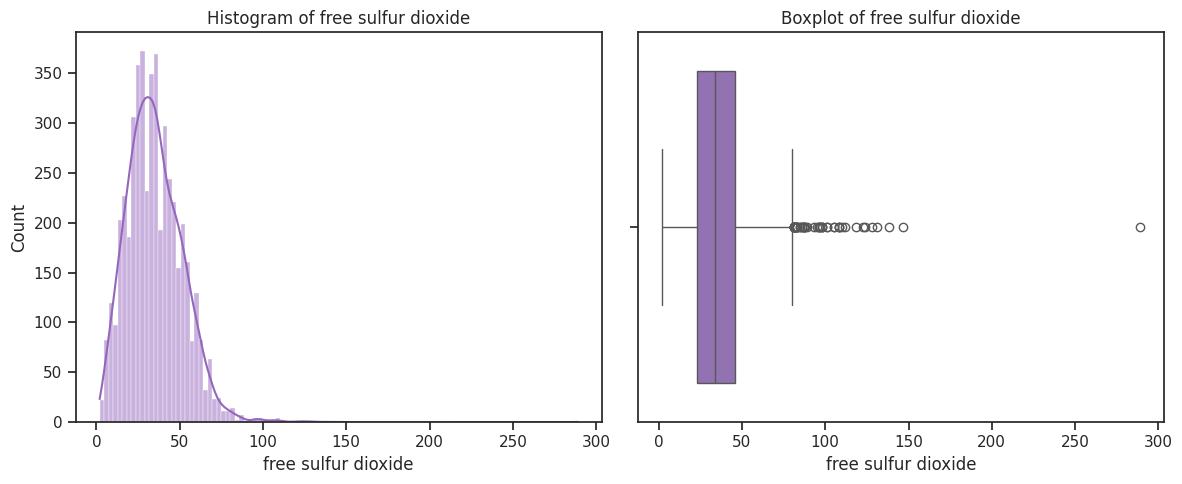

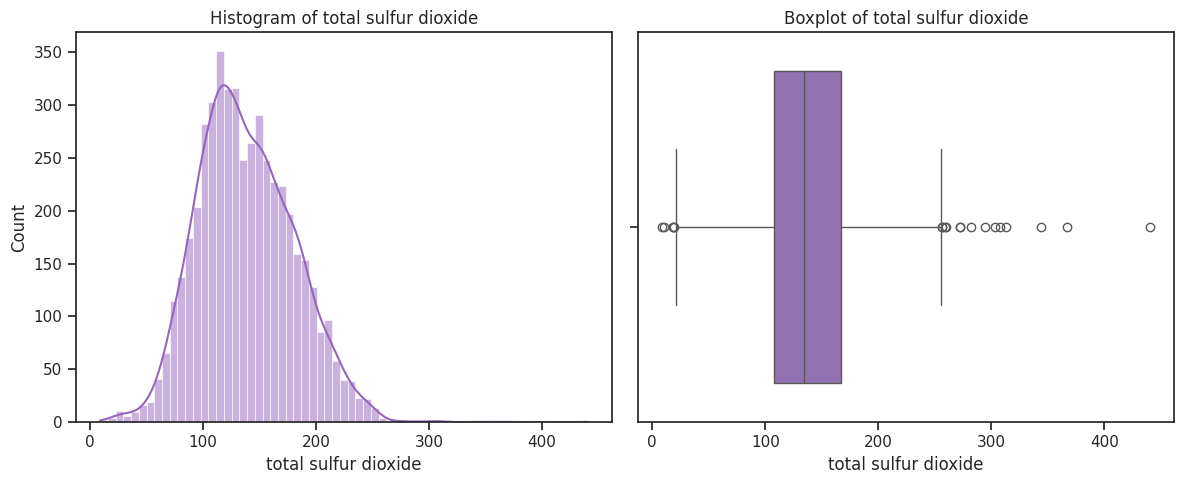

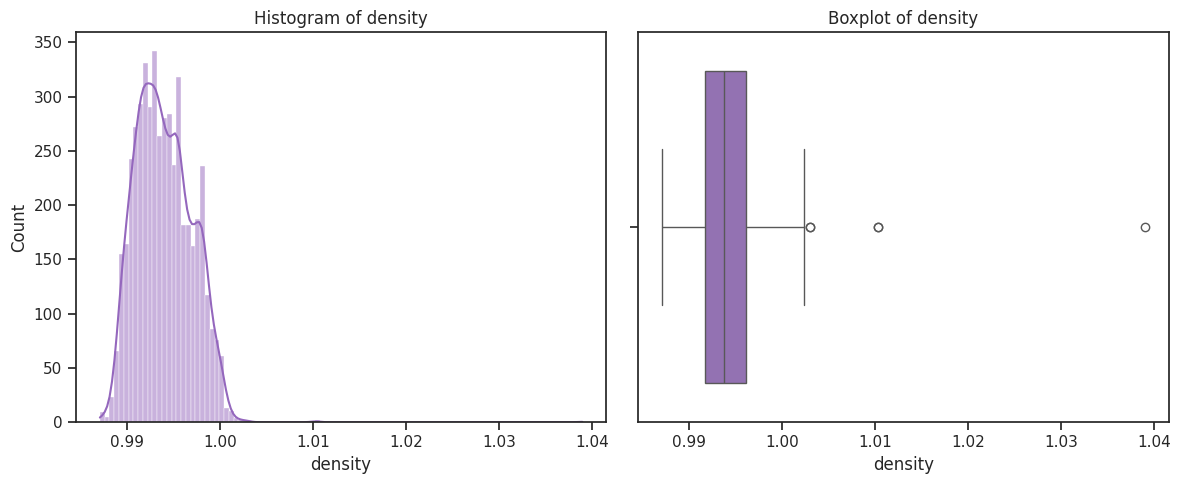

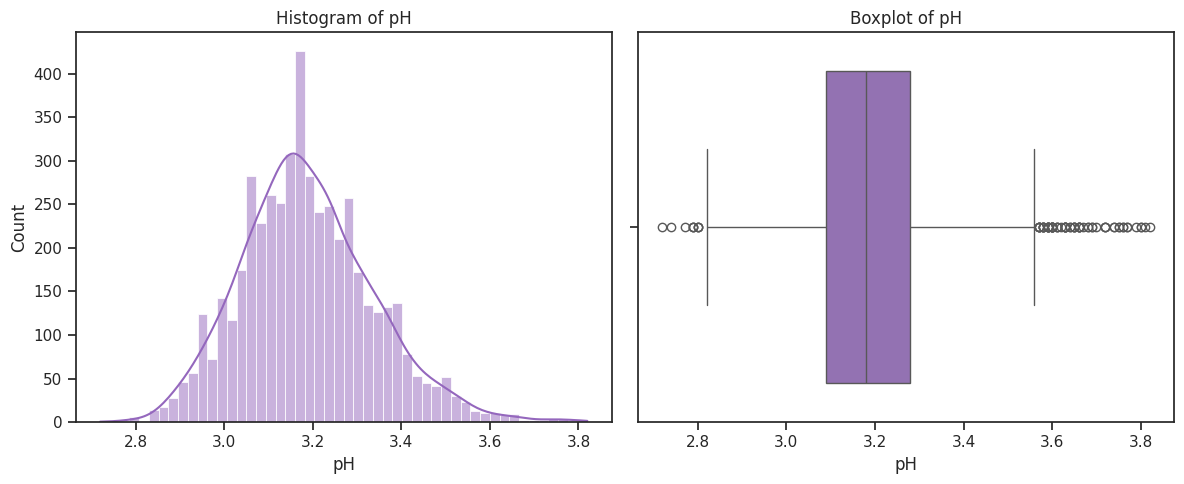

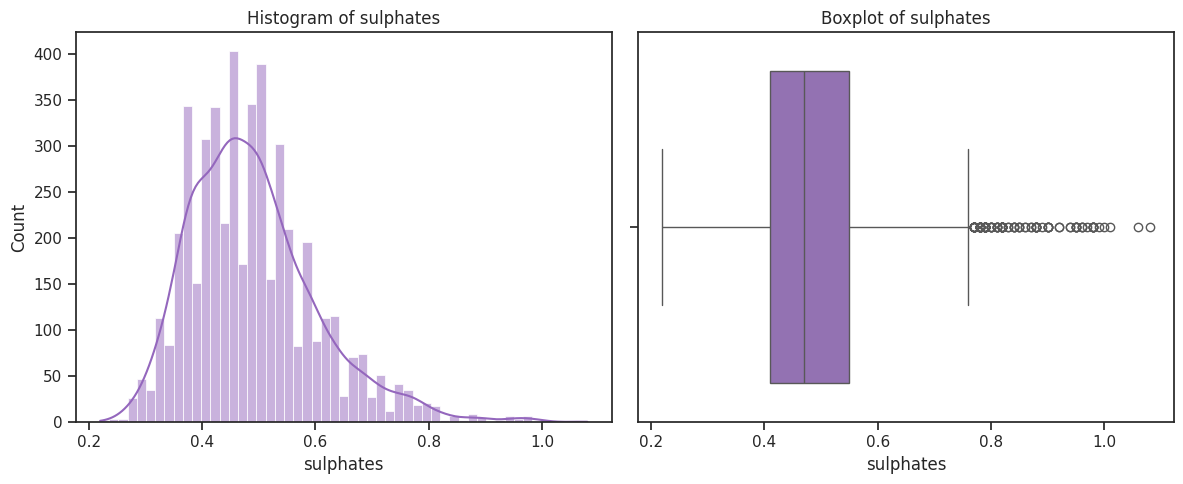

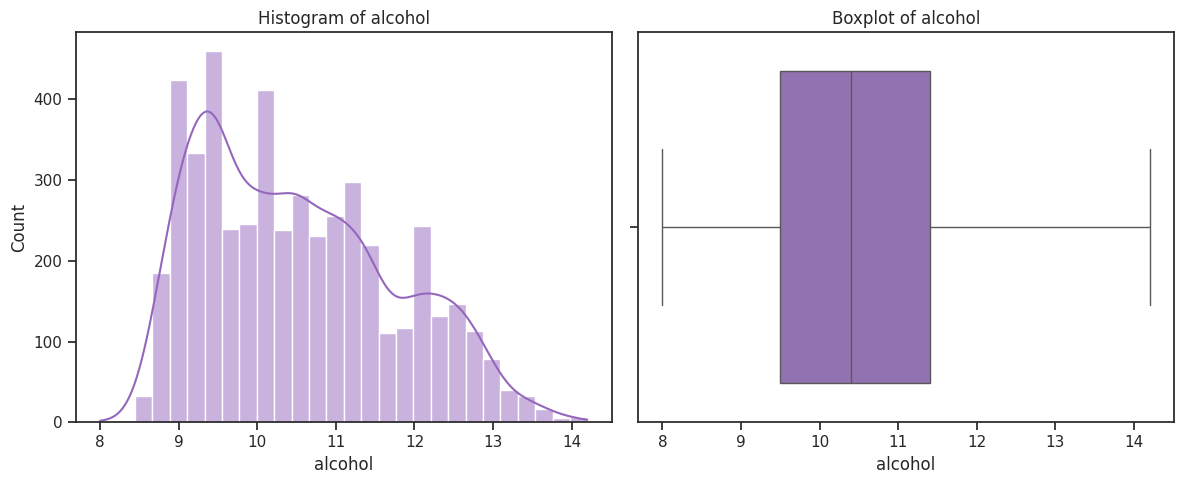

In [64]:
univariate_analysis(df_w)

In [44]:
calculate_univariate_statistics(df_r)


fixed acidity:
Média (µ): 8.32
Desvio Padrão (σ): 1.74
Assimetria (γ): 0.98

volatile acidity:
Média (µ): 0.53
Desvio Padrão (σ): 0.18
Assimetria (γ): 0.67

citric acid:
Média (µ): 0.27
Desvio Padrão (σ): 0.19
Assimetria (γ): 0.32

residual sugar:
Média (µ): 2.54
Desvio Padrão (σ): 1.41
Assimetria (γ): 4.54

chlorides:
Média (µ): 0.09
Desvio Padrão (σ): 0.05
Assimetria (γ): 5.68

free sulfur dioxide:
Média (µ): 15.87
Desvio Padrão (σ): 10.46
Assimetria (γ): 1.25

total sulfur dioxide:
Média (µ): 46.47
Desvio Padrão (σ): 32.90
Assimetria (γ): 1.51

density:
Média (µ): 1.00
Desvio Padrão (σ): 0.00
Assimetria (γ): 0.07

pH:
Média (µ): 3.31
Desvio Padrão (σ): 0.15
Assimetria (γ): 0.19

sulphates:
Média (µ): 0.66
Desvio Padrão (σ): 0.17
Assimetria (γ): 2.43

alcohol:
Média (µ): 10.42
Desvio Padrão (σ): 1.07
Assimetria (γ): 0.86

quality:
Média (µ): 5.64
Desvio Padrão (σ): 0.81
Assimetria (γ): 0.22


In [45]:
calculate_univariate_statistics(df_w)


fixed acidity:
Média (µ): 6.85
Desvio Padrão (σ): 0.84
Assimetria (γ): 0.65

volatile acidity:
Média (µ): 0.28
Desvio Padrão (σ): 0.10
Assimetria (γ): 1.58

citric acid:
Média (µ): 0.33
Desvio Padrão (σ): 0.12
Assimetria (γ): 1.28

residual sugar:
Média (µ): 6.39
Desvio Padrão (σ): 5.07
Assimetria (γ): 1.08

chlorides:
Média (µ): 0.05
Desvio Padrão (σ): 0.02
Assimetria (γ): 5.02

free sulfur dioxide:
Média (µ): 35.31
Desvio Padrão (σ): 17.01
Assimetria (γ): 1.41

total sulfur dioxide:
Média (µ): 138.36
Desvio Padrão (σ): 42.50
Assimetria (γ): 0.39

density:
Média (µ): 0.99
Desvio Padrão (σ): 0.00
Assimetria (γ): 0.98

pH:
Média (µ): 3.19
Desvio Padrão (σ): 0.15
Assimetria (γ): 0.46

sulphates:
Média (µ): 0.49
Desvio Padrão (σ): 0.11
Assimetria (γ): 0.98

alcohol:
Média (µ): 10.51
Desvio Padrão (σ): 1.23
Assimetria (γ): 0.49

quality:
Média (µ): 5.88
Desvio Padrão (σ): 0.89
Assimetria (γ): 0.16


3. Class-conditional mono-variate analysis of each of the predictors. Class-conditional mean µ, standard deviation σ and skewness γ, with d = 1, . . . , D, using all the N observations

In [89]:
def conditional_univariate_analysis(data, class_column):

    output_dir = 'figures'

    for column in data.columns:
        
        if column == class_column:
            continue 

        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        sns.histplot(data, x=column, hue=class_column, kde=True, element="step", stat="density")
        plt.title(f'Histogram of {column} by {class_column}')
        plt.xlabel(column)
        plt.ylabel('Density')

        plt.subplot(1, 2, 2)
        sns.boxplot(x=class_column, y=column, data=data)
        plt.title(f'Boxplot of {column} by {class_column}')
        plt.xlabel(class_column)
        plt.ylabel(column)
    
        plt.tight_layout()
        plt.savefig(f'{output_dir}/conditional_univariate_{column}_by_{class_column}.png')
        plt.show()


In [103]:
def combined_hist_class_conditional(data, class_column):

    output_dir = 'figures'

    num_cols = 3  
    num_variables = len(data.columns) 
    num_rows = math.ceil(num_variables / num_cols)  

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), constrained_layout=True)
    axes = axes.flatten()  

    for i, column in enumerate(data.columns):
        sns.histplot(data[column], kde=True, ax=axes[i], color=colors[i % len(colors)])  
        axes[i].set_title(f'Histogram of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.savefig(f'{output_dir}/combined_hist_class_cond.png')
    plt.show()

In [127]:
def combined_box_class_conditional(data, class_column):
    
    output_dir = 'figures'

    num_cols = 3  
    num_variables = len(data.columns) - 1  
    num_rows = math.ceil(num_variables / num_cols) 

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), constrained_layout=True)
    axes = axes.flatten()  

    index = 0 
    
    for column in data.columns:
        
        if column == class_column:
            continue 

        sns.boxplot(x=class_column, y=column, data=data, ax=axes[index], palette=colors, hue=class_column)
        axes[index].set_title(f'Boxplot de {column} por {class_column}')
        axes[index].set_xlabel(class_column)
        axes[index].set_ylabel(column)

        if axes[index].get_legend() is not None:  
            axes[index].legend_.remove()

        index += 1 

    for j in range(index, len(axes)):
        fig.delaxes(axes[j])

    plt.savefig(f'{output_dir}/combined_box_class_cond.png')
    plt.show()


In [140]:
from scipy.stats import skew

def calculate_c_conditional(data, class_column):

    for column in data.columns:
        
        if column == class_column:
            continue 
        
        for cls, group in data.groupby(class_column):
            
            subset = group[column]  
            
            mean = subset.mean()
            std = subset.std()
            skewness = skew(subset)  

            print(f'\n{column} | Classe {cls}:')
            print(f'Média (µ): {mean:.2f}')
            print(f'Desvio Padrão (σ): {std:.2f}')
            print(f'Assimetria (γ): {skewness:.2f}')


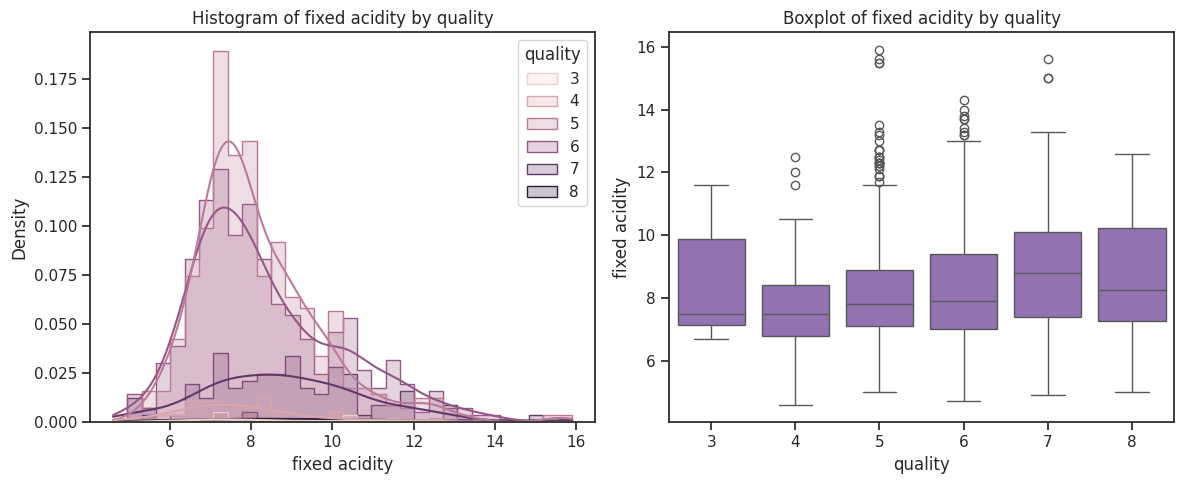

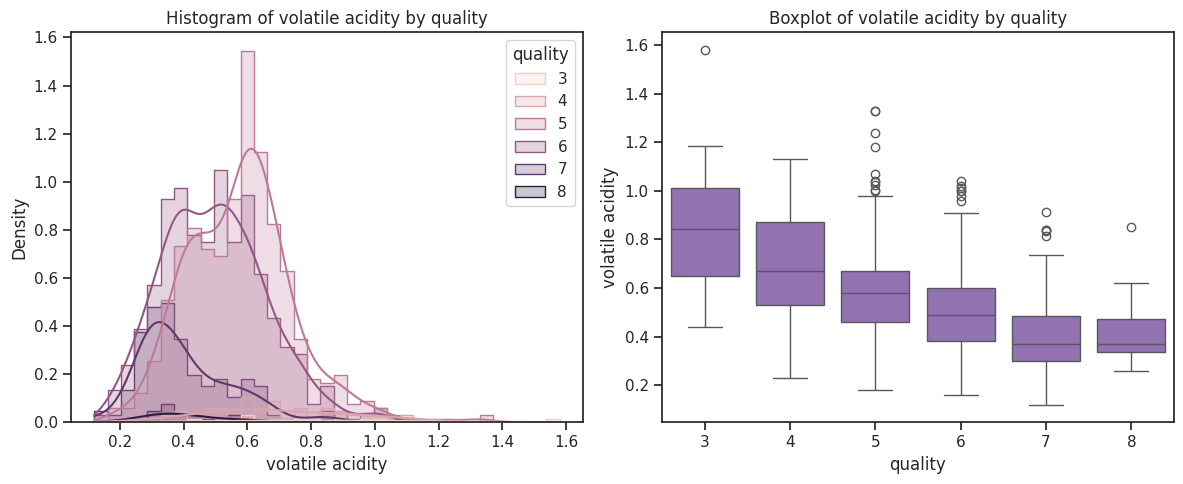

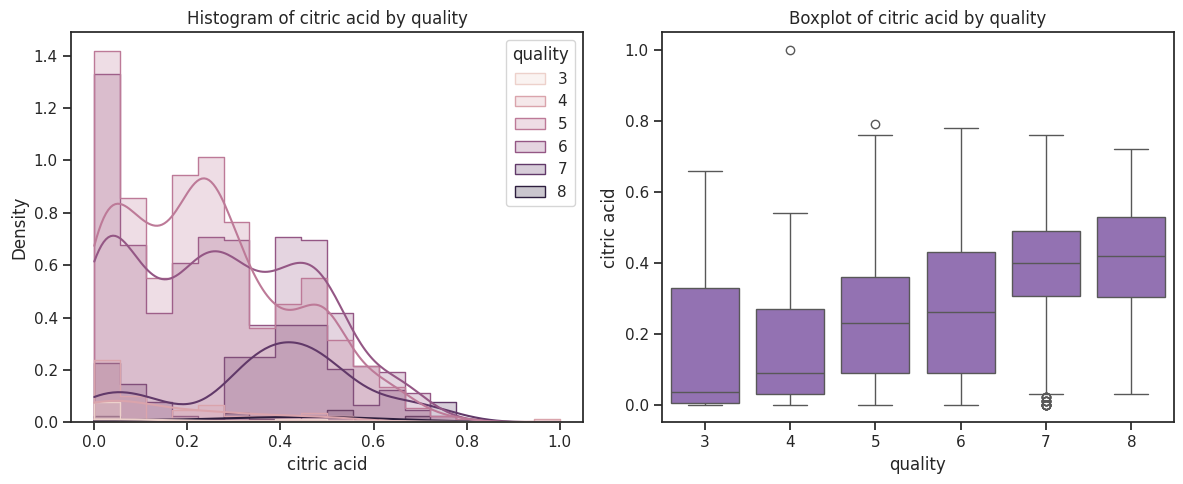

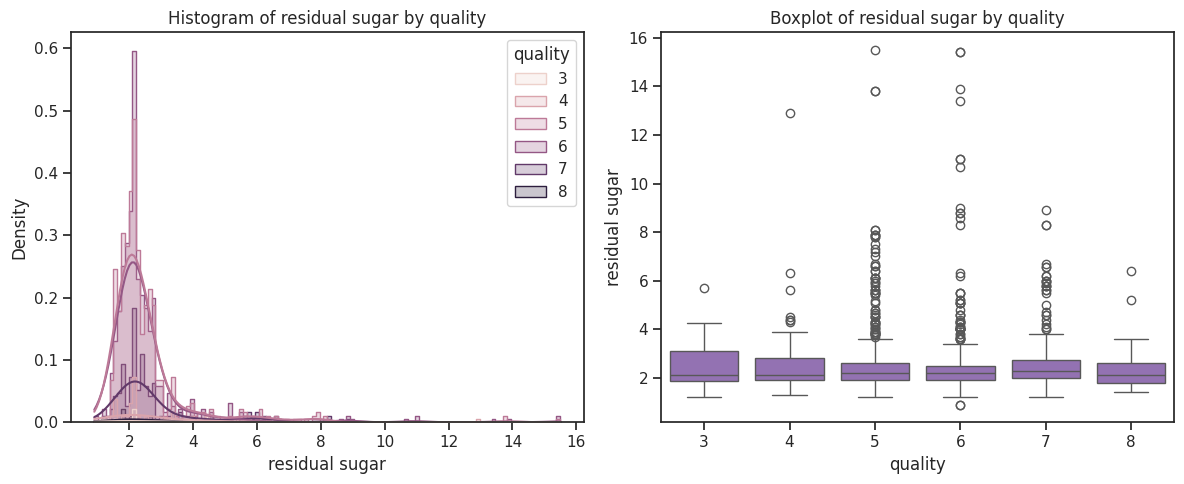

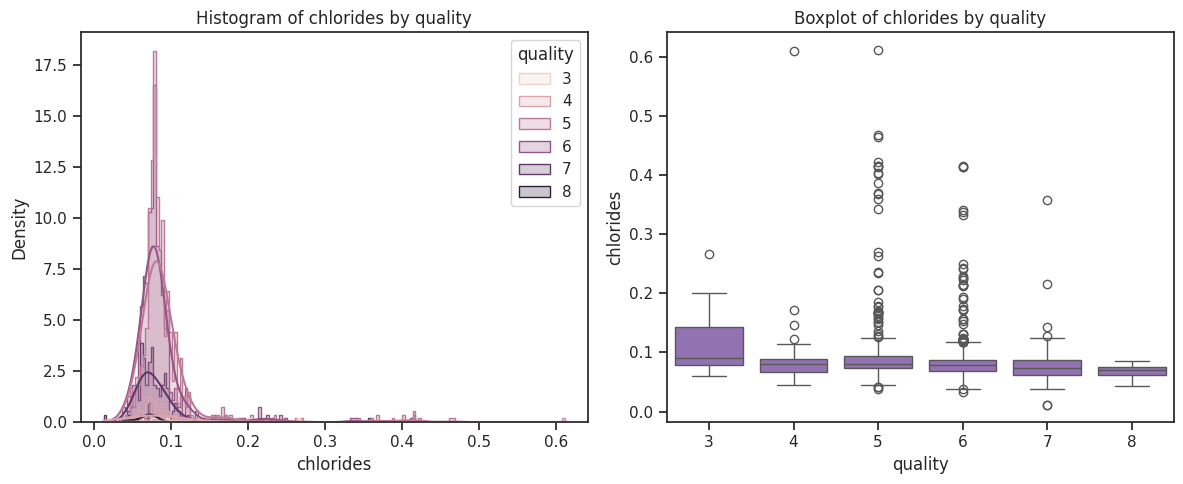

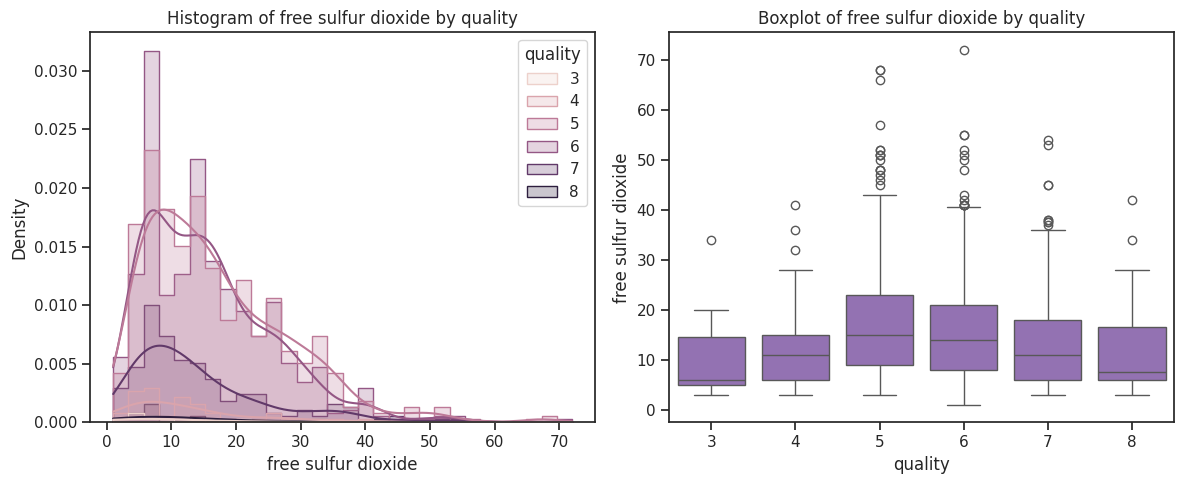

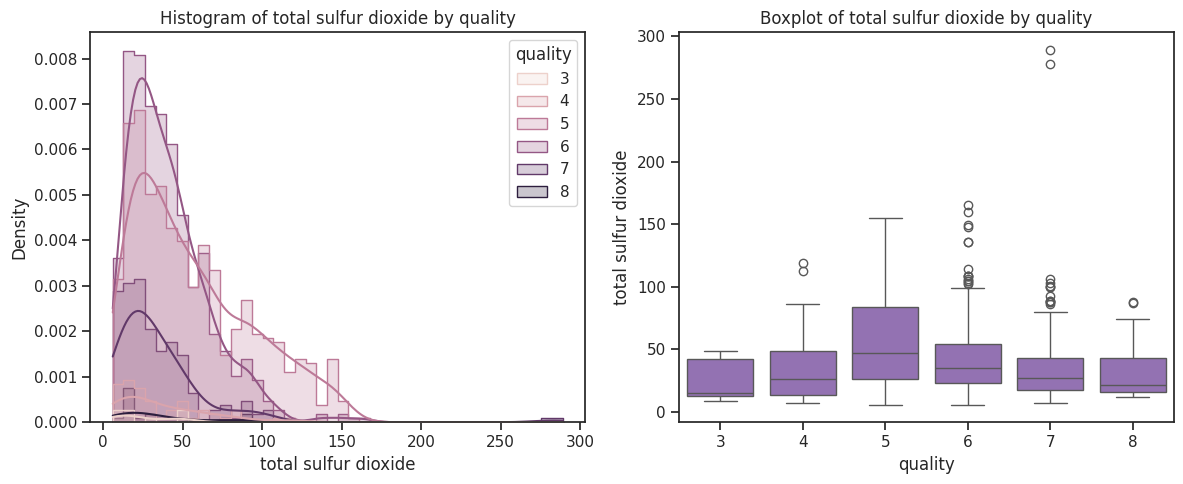

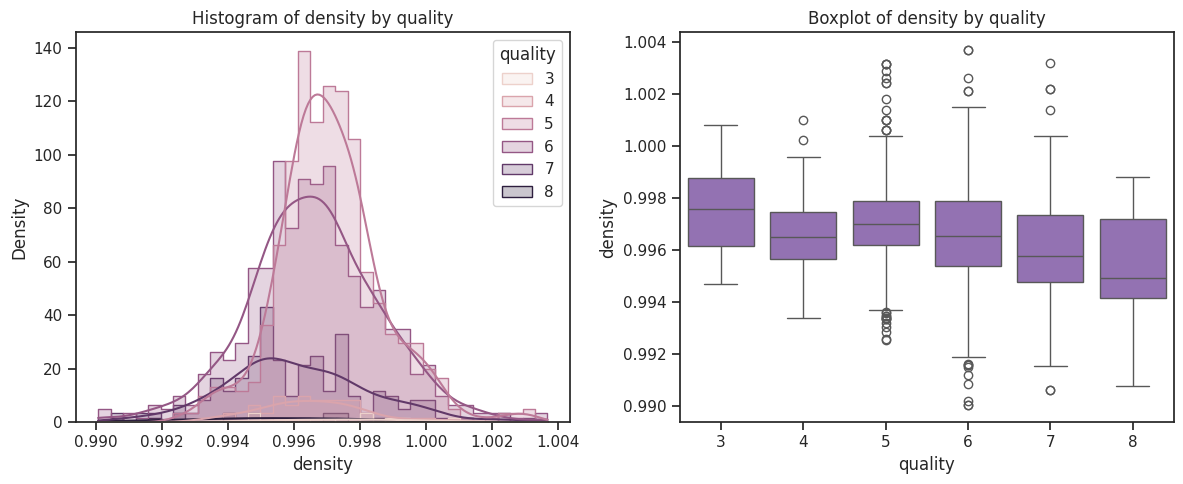

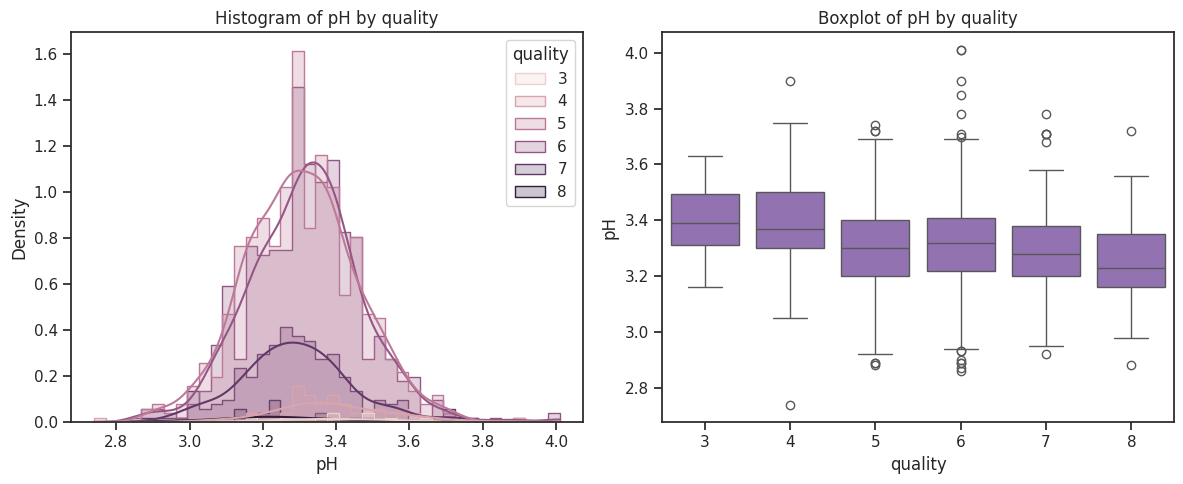

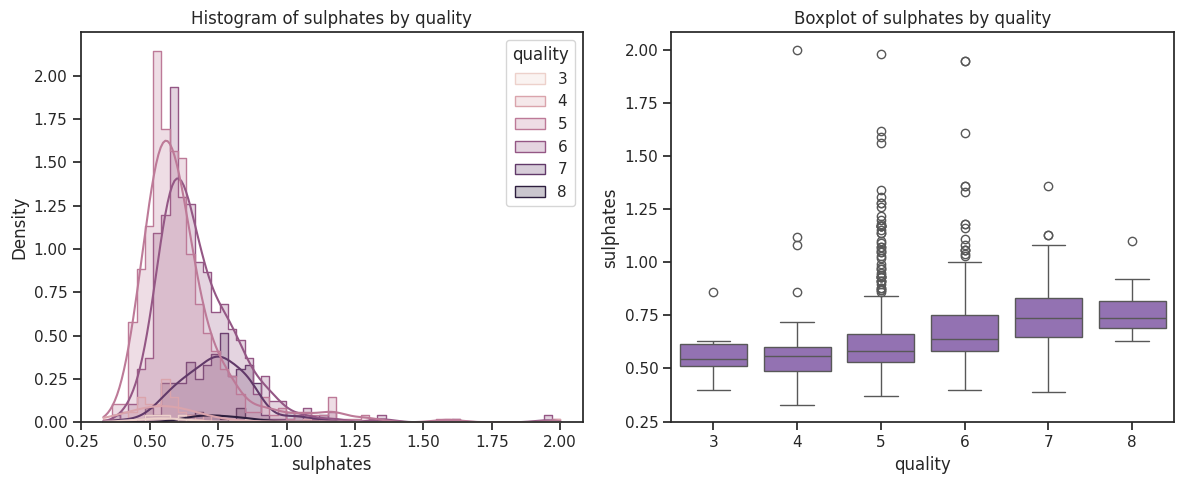

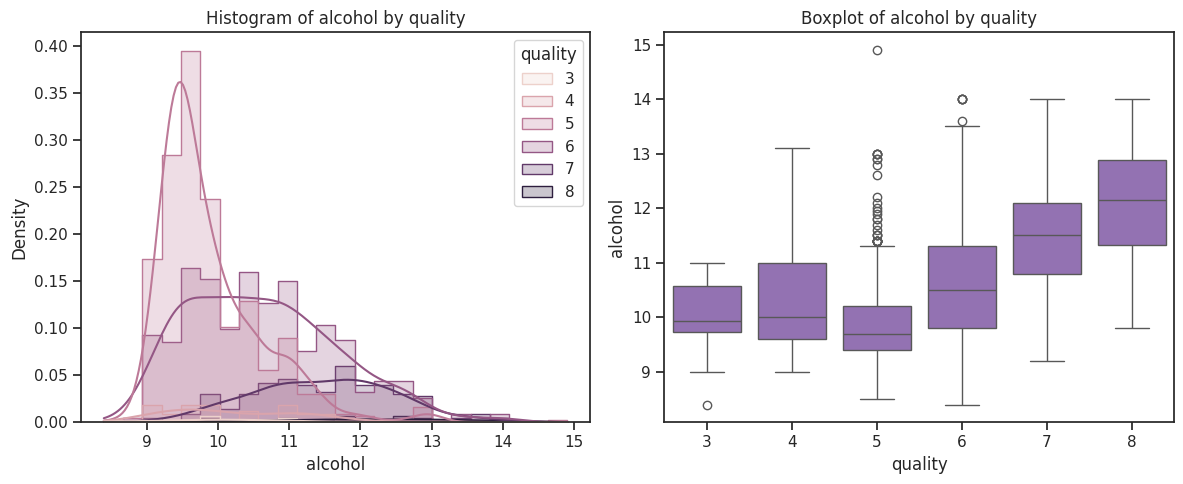

In [90]:
conditional_univariate_analysis(df_r, 'quality')

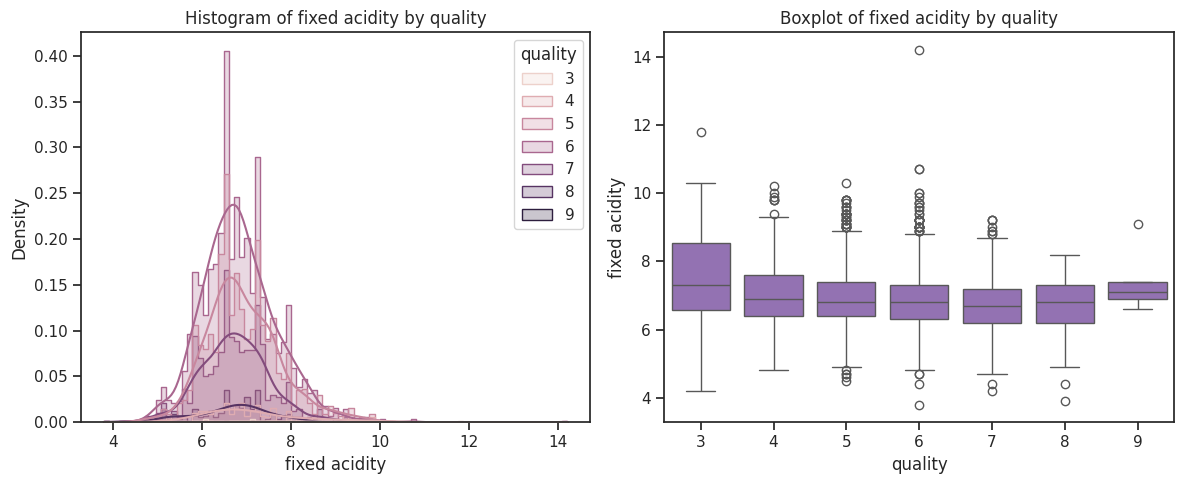

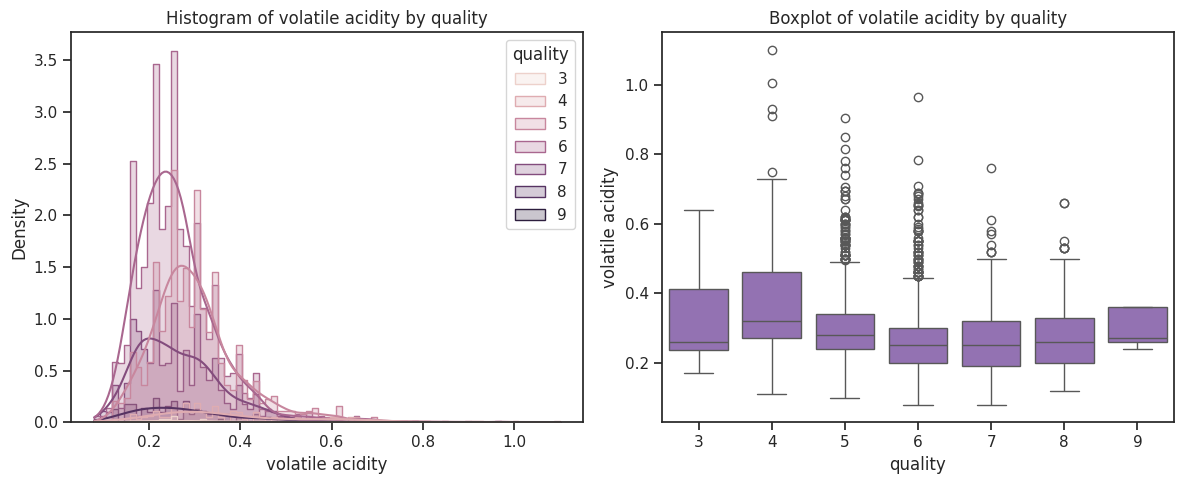

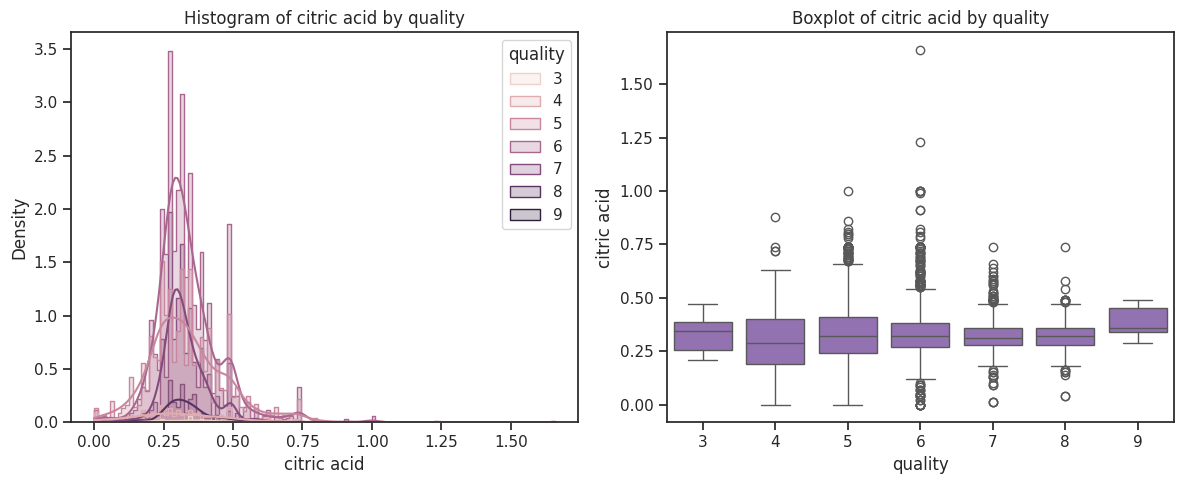

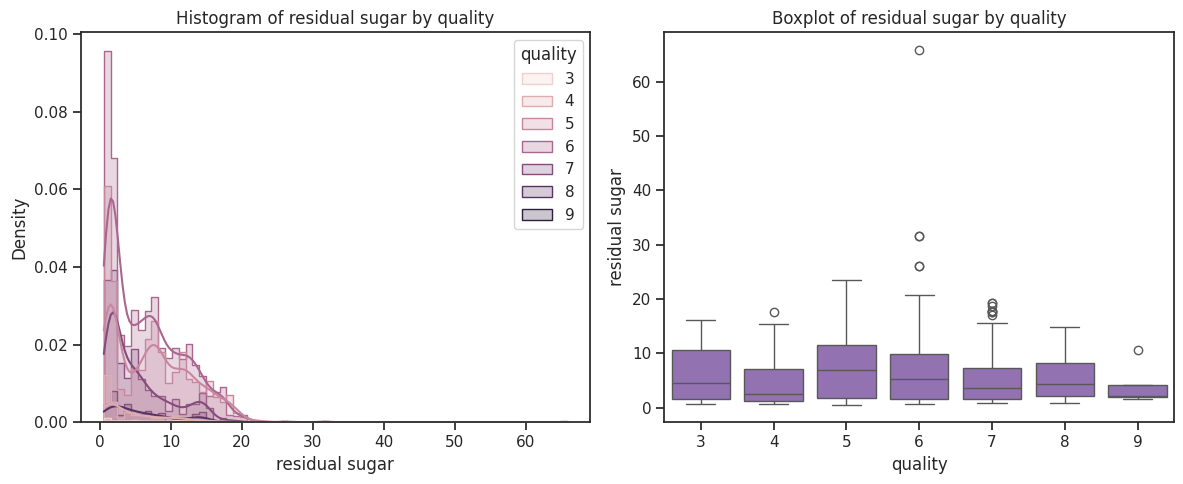

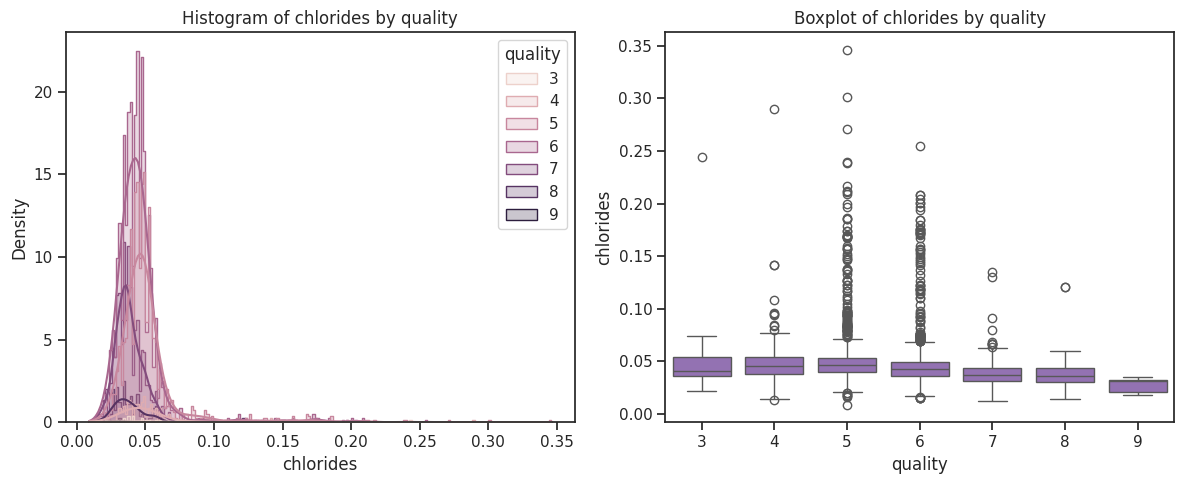

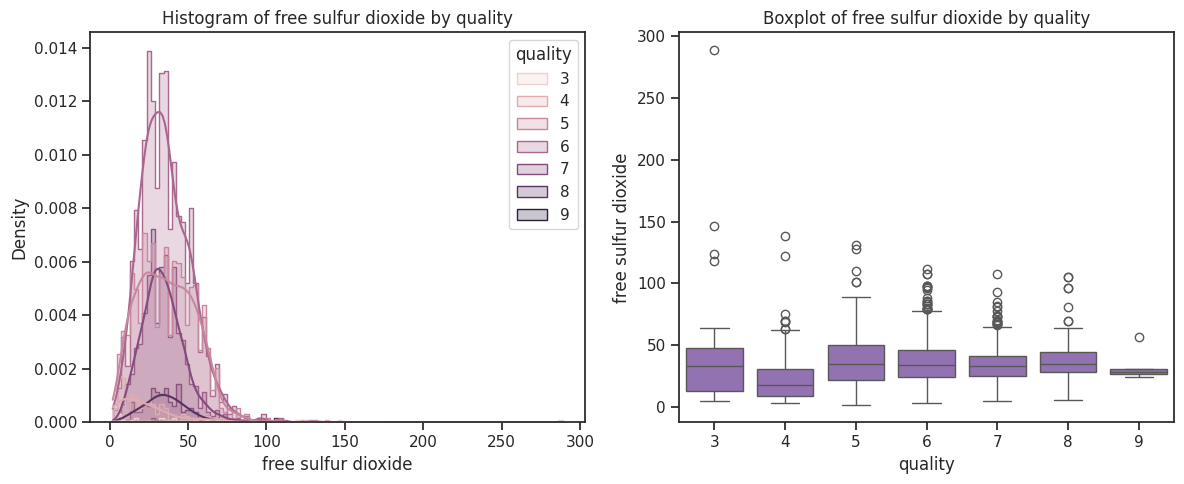

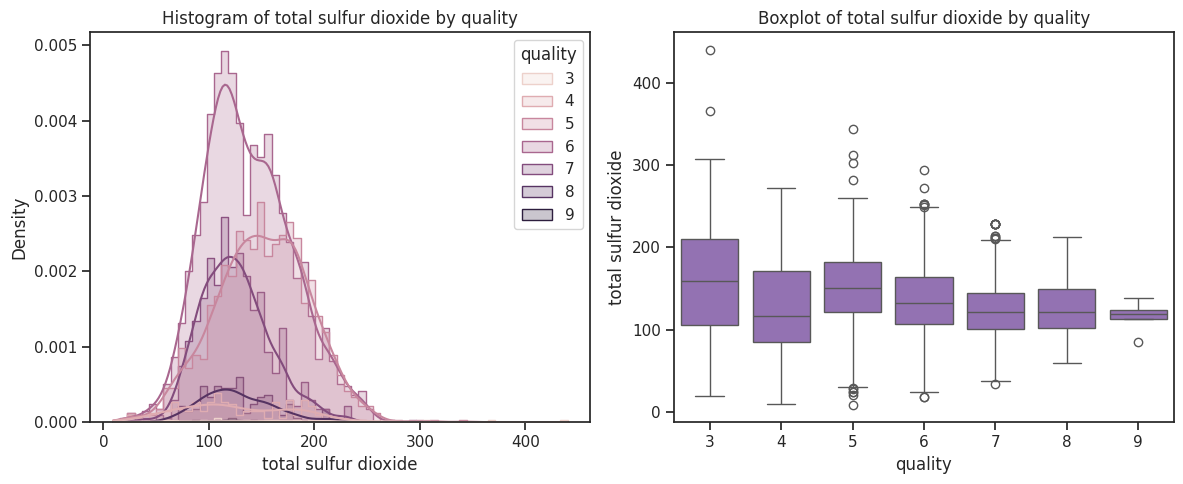

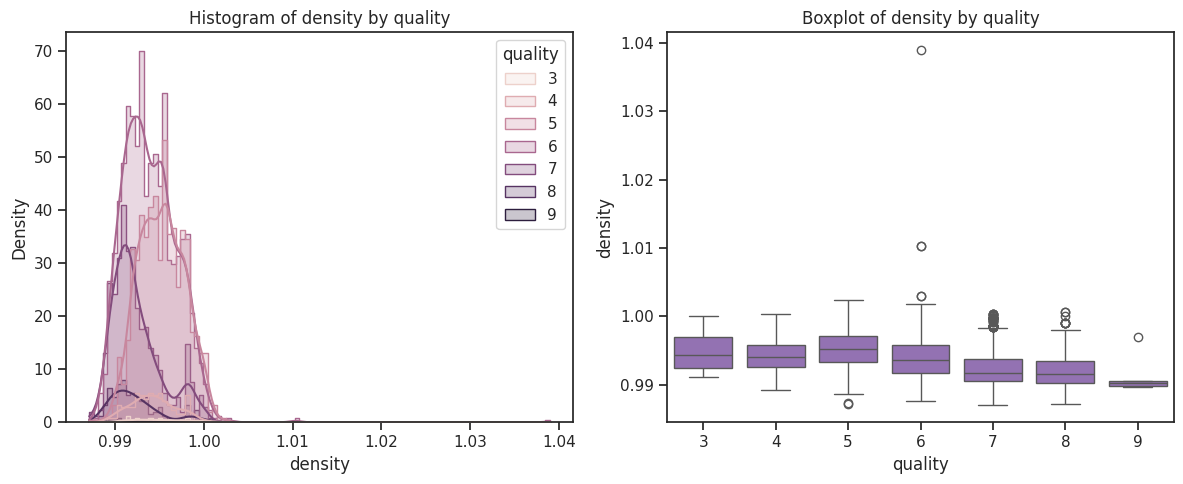

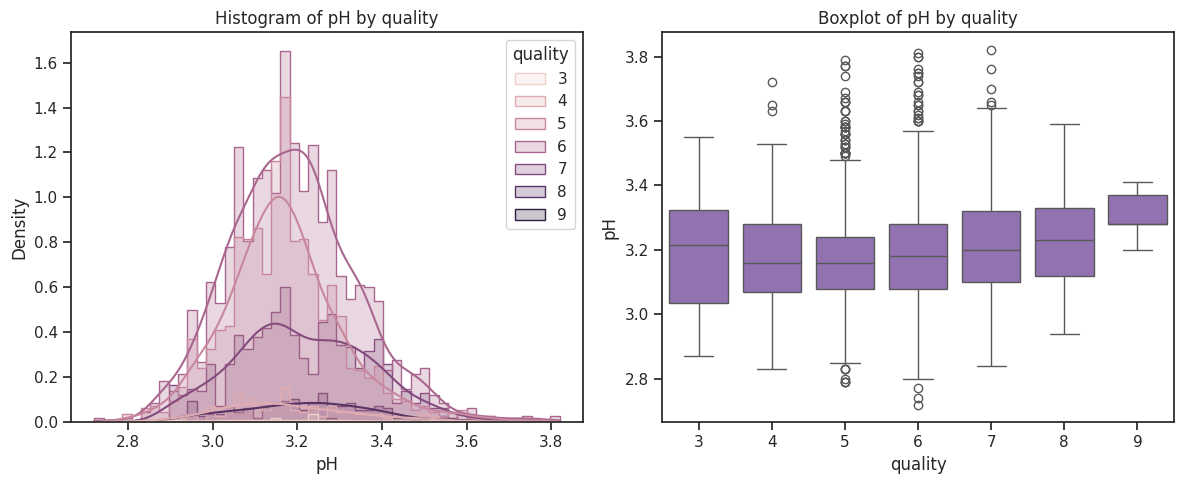

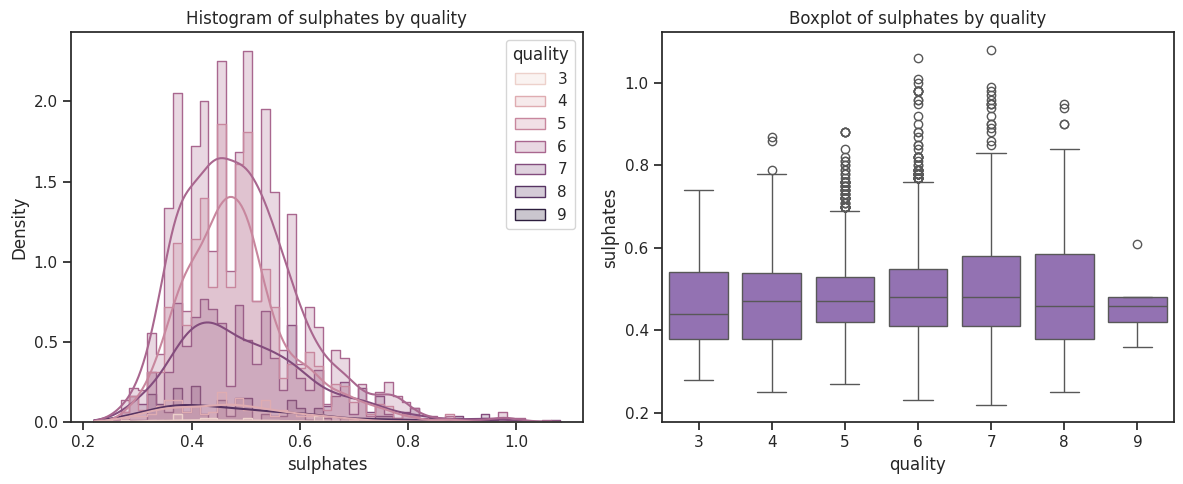

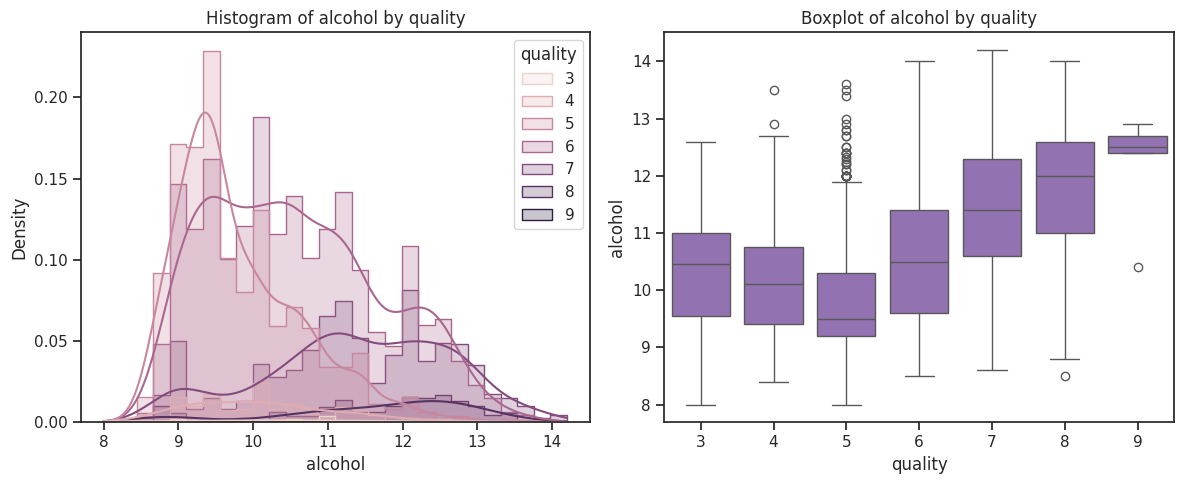

In [135]:
conditional_univariate_analysis(df_w, 'quality')

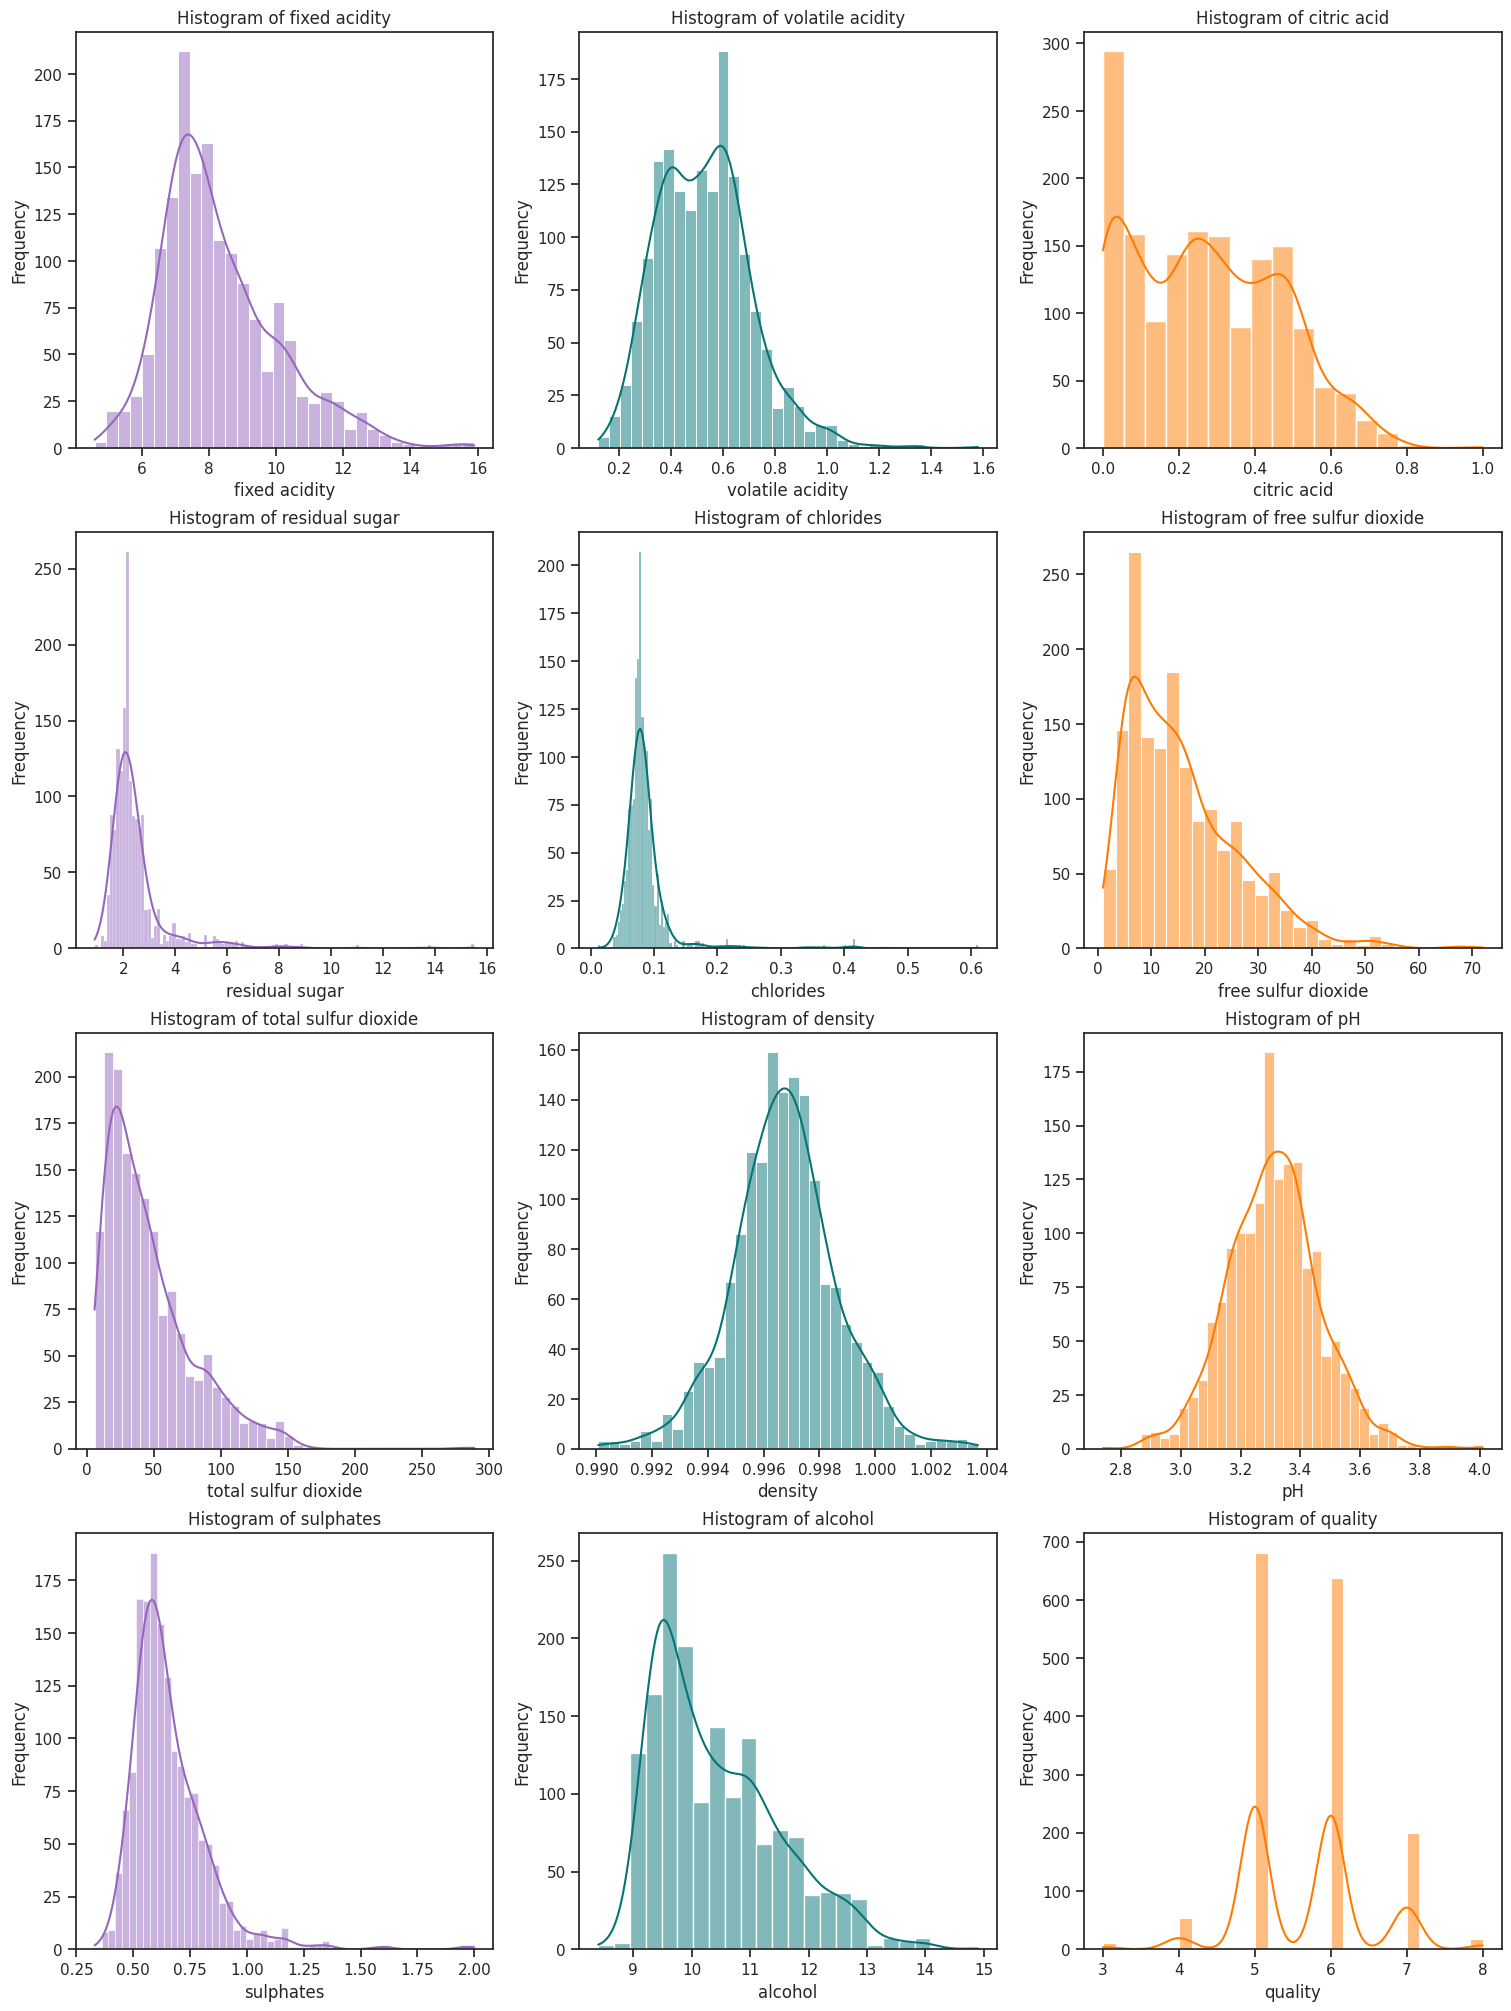

In [104]:
combined_hist_class_conditional(df_r, 'quality')

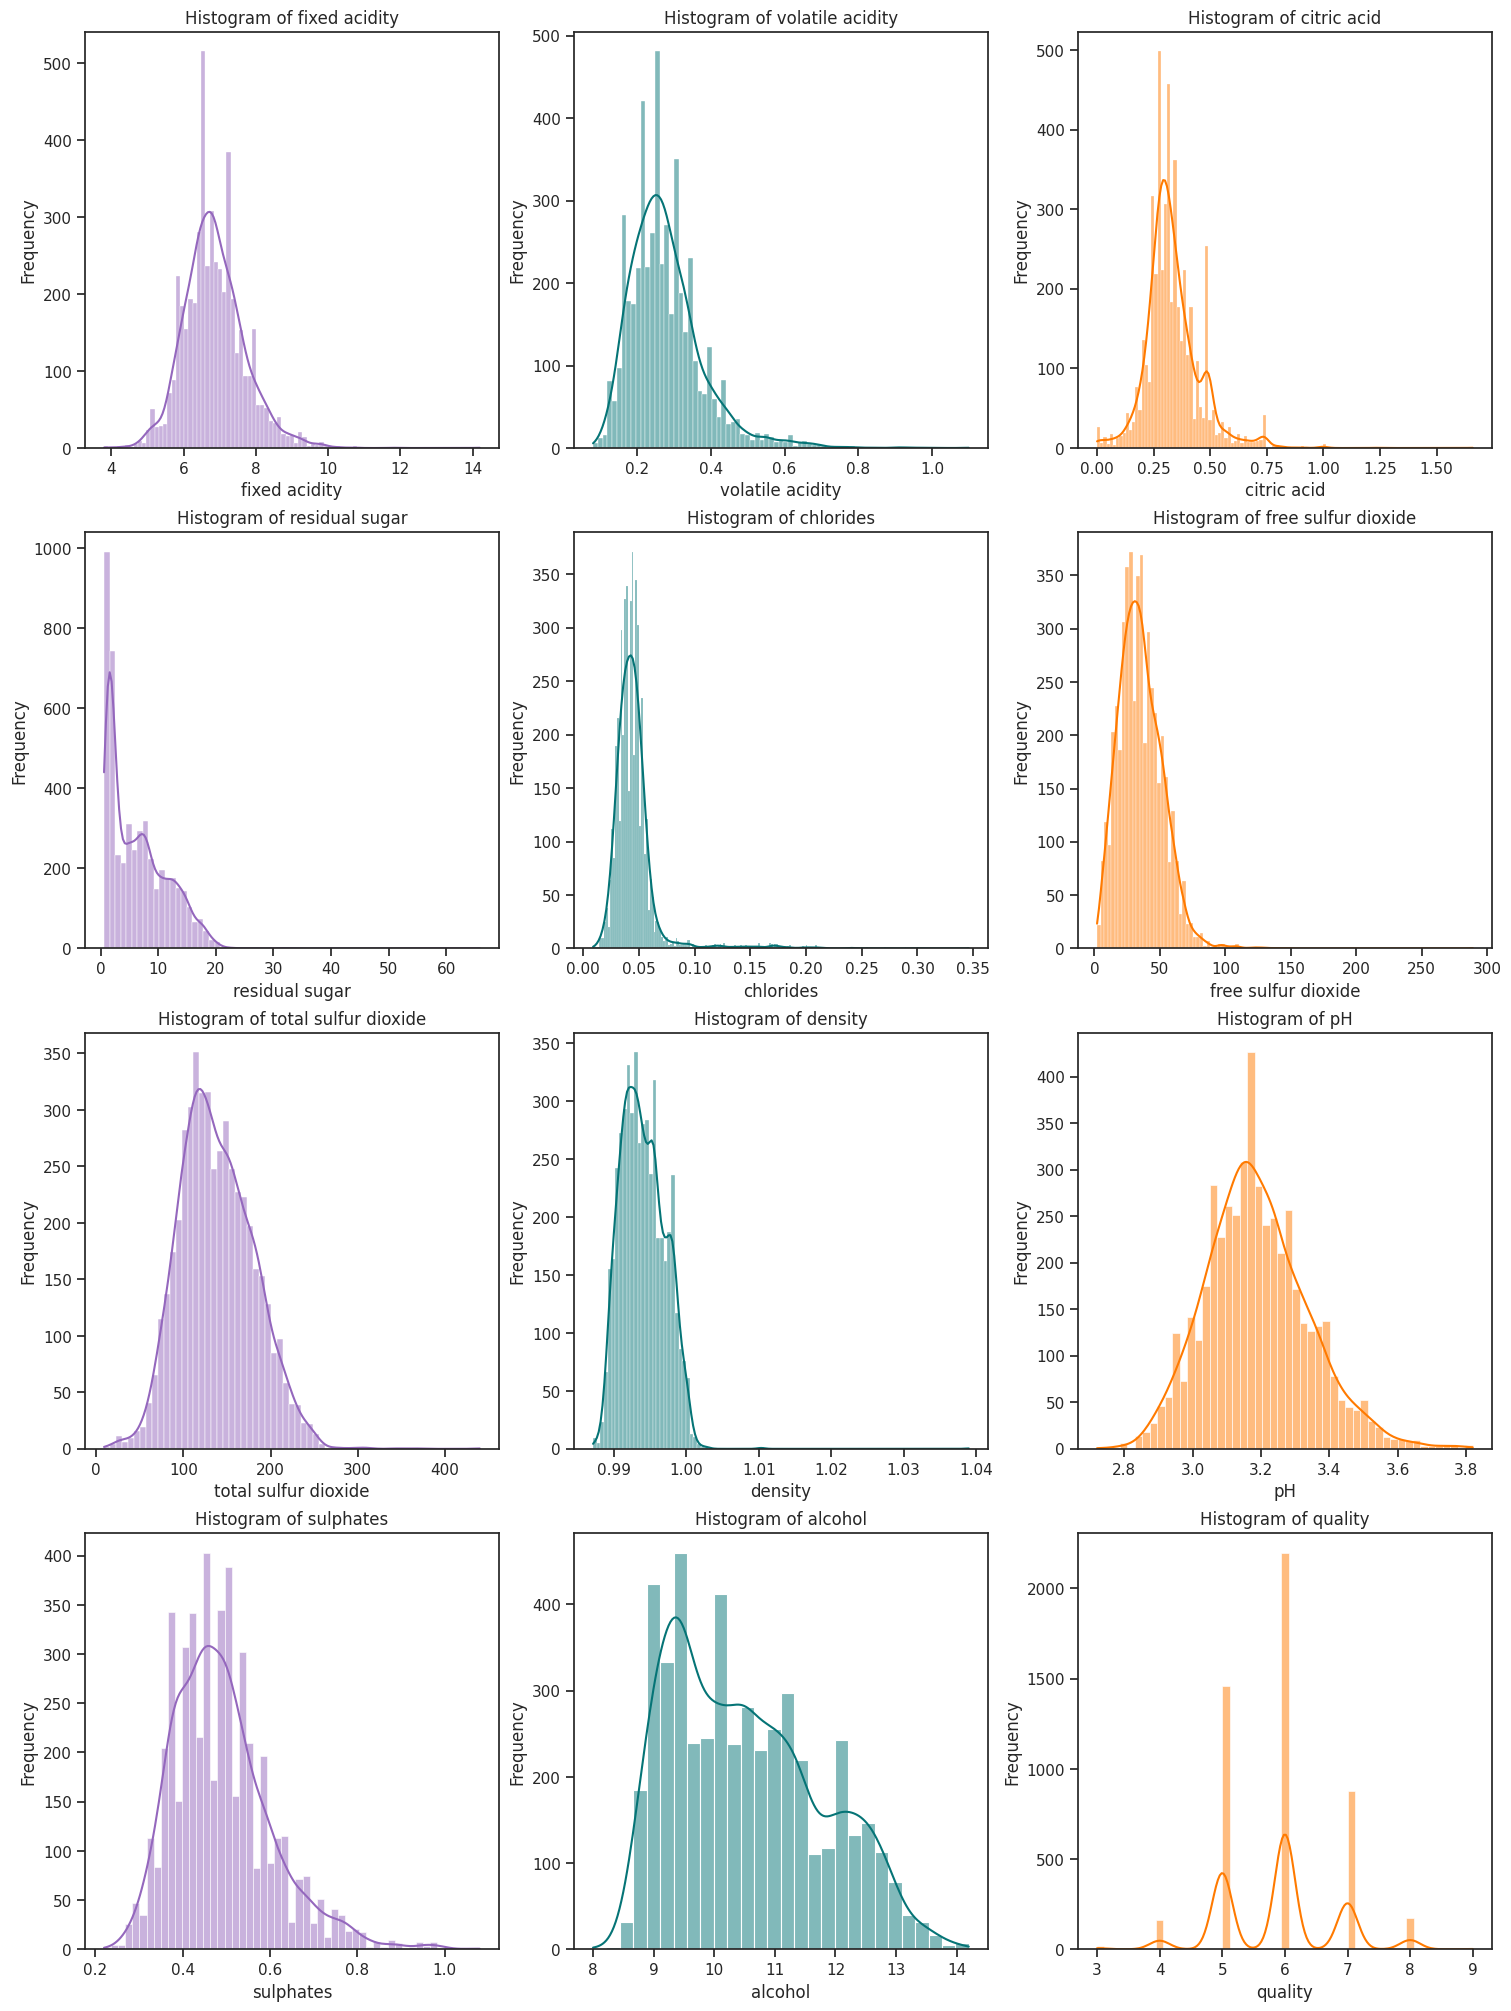

In [105]:
combined_hist_class_conditional(df_w, 'quality')

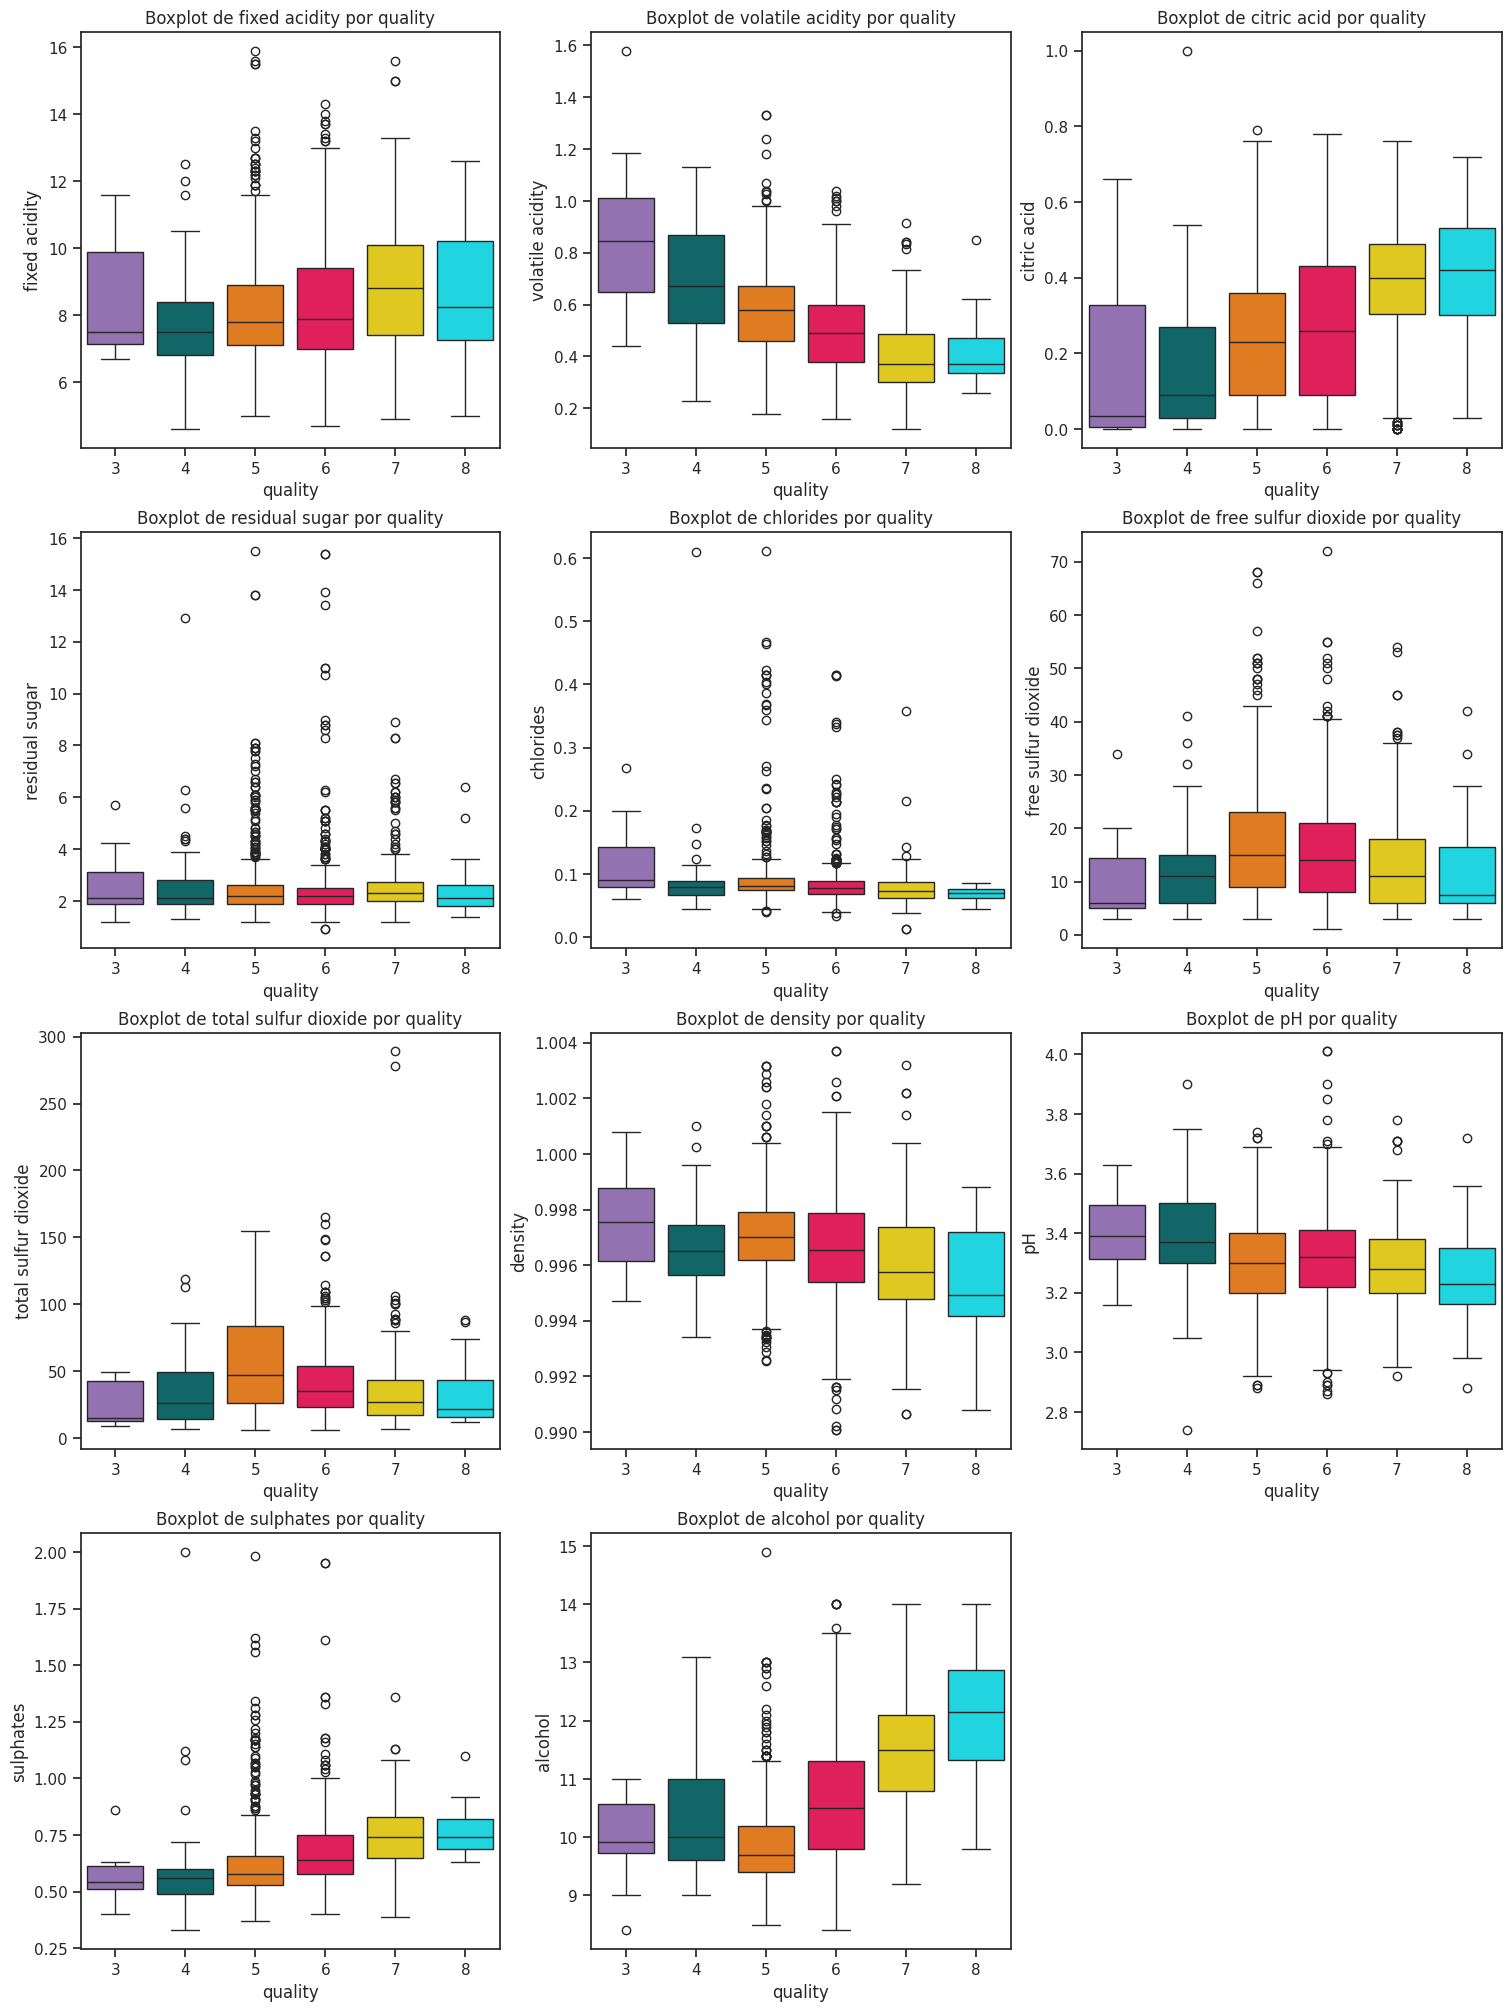

In [128]:
combined_box_class_conditional(df_r, 'quality')

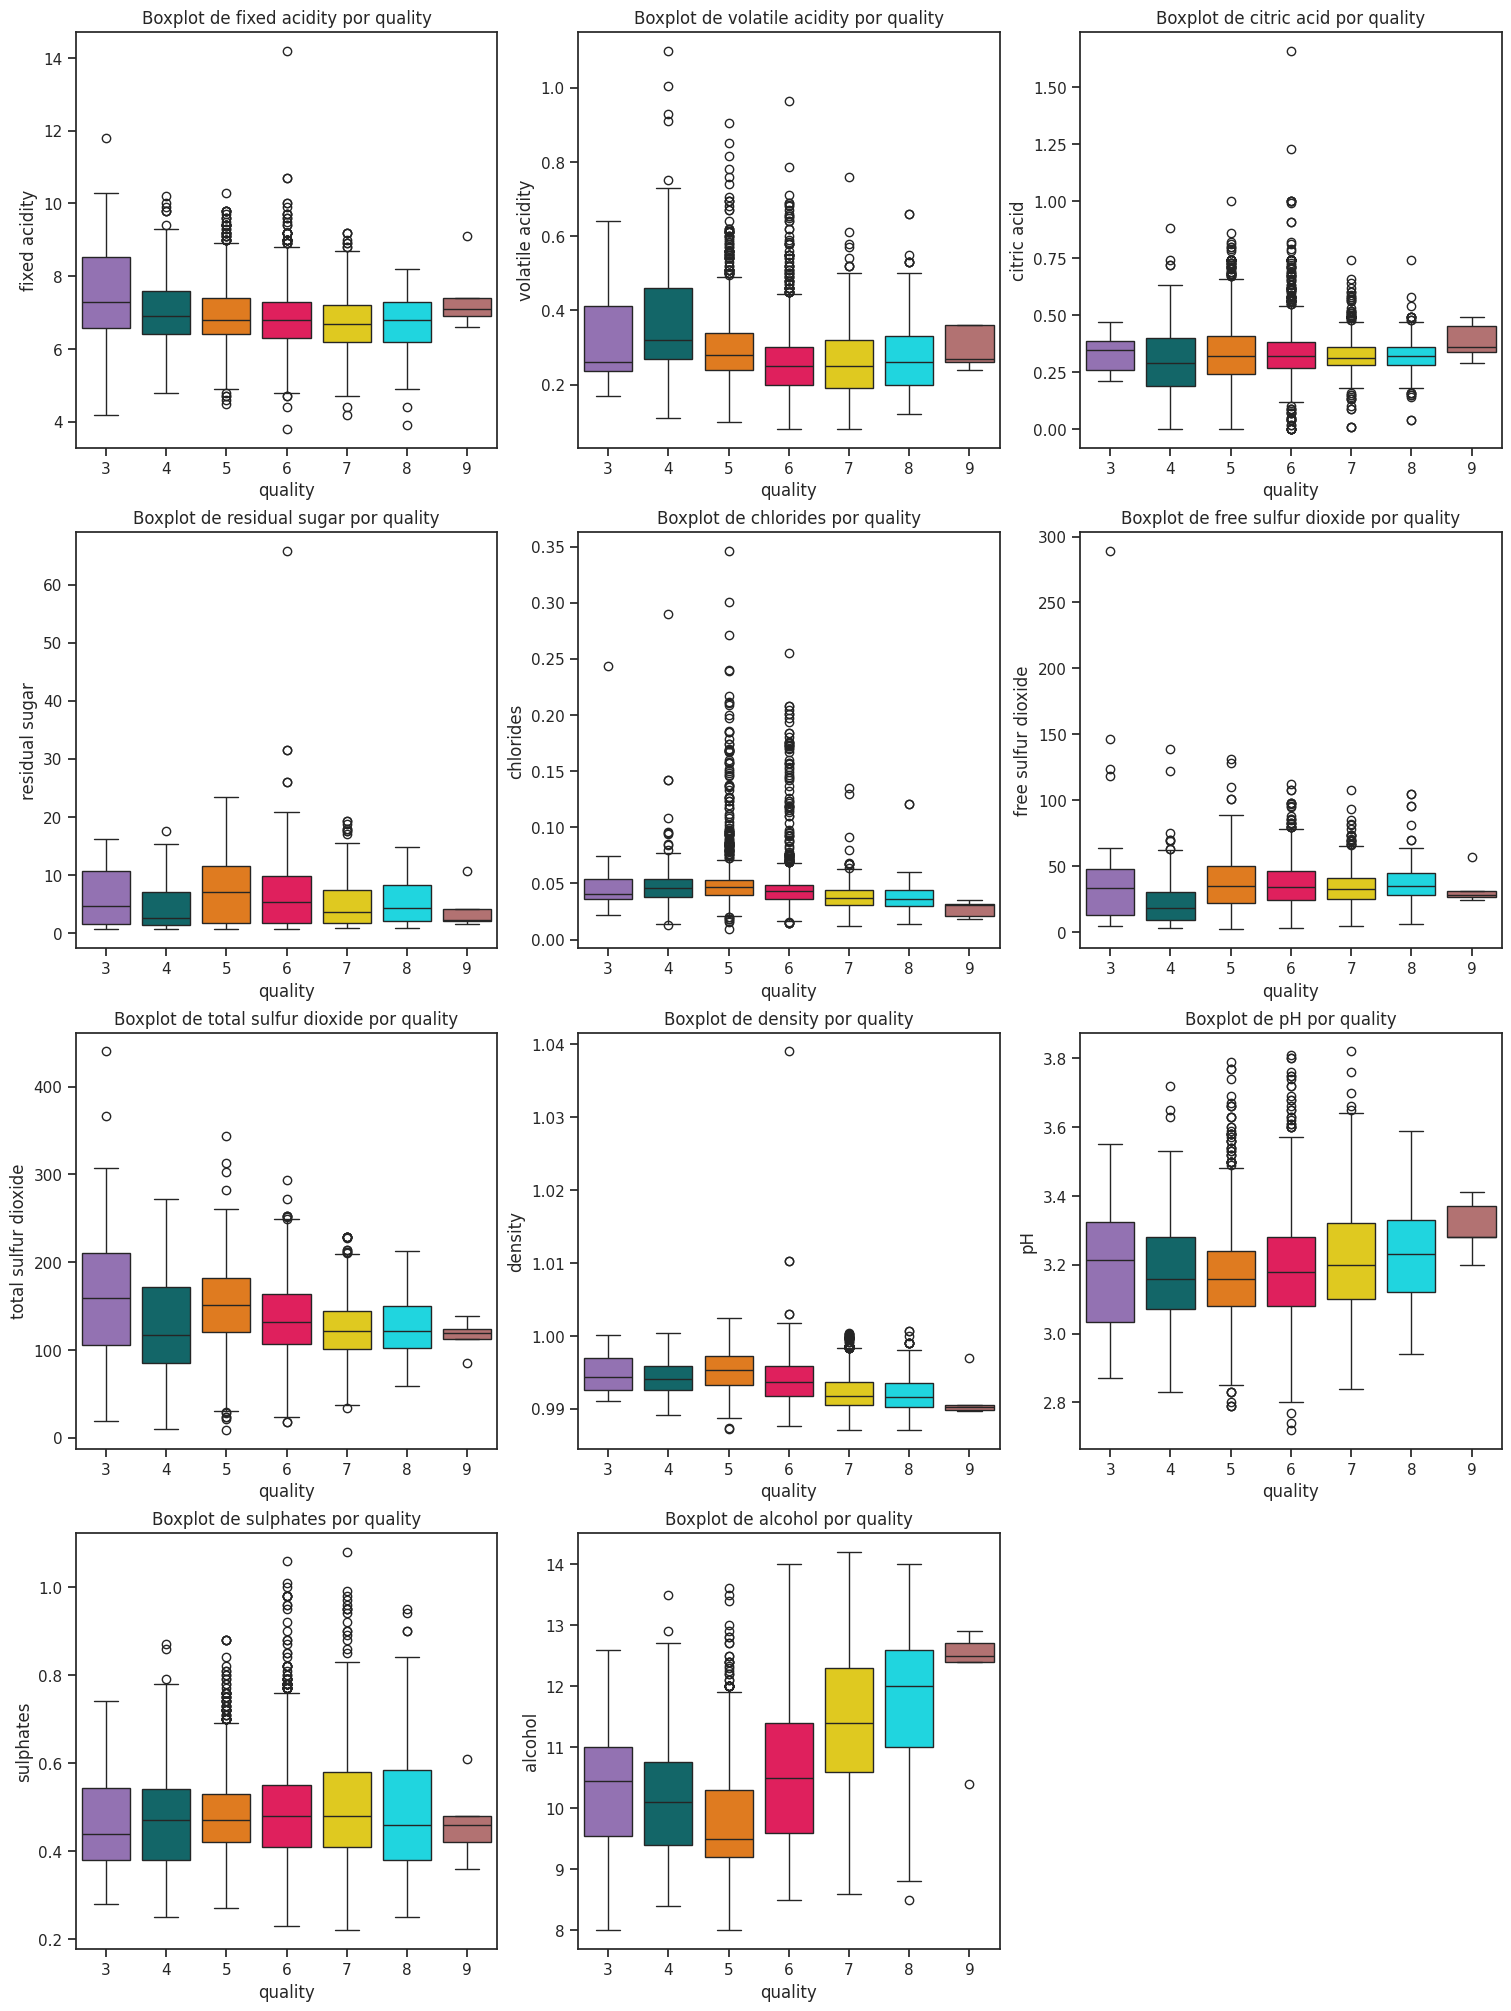

In [131]:
combined_box_class_conditional(df_w, 'quality')

In [141]:
calculate_c_conditional(df_r, 'quality')


fixed acidity | Classe 3:
Média (µ): 8.36
Desvio Padrão (σ): 1.77
Assimetria (γ): 0.80

fixed acidity | Classe 4:
Média (µ): 7.78
Desvio Padrão (σ): 1.63
Assimetria (γ): 0.89

fixed acidity | Classe 5:
Média (µ): 8.17
Desvio Padrão (σ): 1.56
Assimetria (γ): 1.38

fixed acidity | Classe 6:
Média (µ): 8.35
Desvio Padrão (σ): 1.80
Assimetria (γ): 0.83

fixed acidity | Classe 7:
Média (µ): 8.87
Desvio Padrão (σ): 1.99
Assimetria (γ): 0.51

fixed acidity | Classe 8:
Média (µ): 8.57
Desvio Padrão (σ): 2.12
Assimetria (γ): 0.04

volatile acidity | Classe 3:
Média (µ): 0.88
Desvio Padrão (σ): 0.33
Assimetria (γ): 0.73

volatile acidity | Classe 4:
Média (µ): 0.69
Desvio Padrão (σ): 0.22
Assimetria (γ): 0.15

volatile acidity | Classe 5:
Média (µ): 0.58
Desvio Padrão (σ): 0.16
Assimetria (γ): 0.59

volatile acidity | Classe 6:
Média (µ): 0.50
Desvio Padrão (σ): 0.16
Assimetria (γ): 0.43

volatile acidity | Classe 7:
Média (µ): 0.40
Desvio Padrão (σ): 0.15
Assimetria (γ): 0.95

volatile acidity

In [142]:
calculate_c_conditional(df_w, 'quality')


fixed acidity | Classe 3:
Média (µ): 7.60
Desvio Padrão (σ): 1.72
Assimetria (γ): 0.51

fixed acidity | Classe 4:
Média (µ): 7.13
Desvio Padrão (σ): 1.08
Assimetria (γ): 0.77

fixed acidity | Classe 5:
Média (µ): 6.93
Desvio Padrão (σ): 0.84
Assimetria (γ): 0.60

fixed acidity | Classe 6:
Média (µ): 6.84
Desvio Padrão (σ): 0.84
Assimetria (γ): 0.75

fixed acidity | Classe 7:
Média (µ): 6.73
Desvio Padrão (σ): 0.76
Assimetria (γ): 0.14

fixed acidity | Classe 8:
Média (µ): 6.66
Desvio Padrão (σ): 0.82
Assimetria (γ): -0.51

fixed acidity | Classe 9:
Média (µ): 7.42
Desvio Padrão (σ): 0.98
Assimetria (γ): 1.18

volatile acidity | Classe 3:
Média (µ): 0.33
Desvio Padrão (σ): 0.14
Assimetria (γ): 0.95

volatile acidity | Classe 4:
Média (µ): 0.38
Desvio Padrão (σ): 0.17
Assimetria (γ): 1.39

volatile acidity | Classe 5:
Média (µ): 0.30
Desvio Padrão (σ): 0.10
Assimetria (γ): 1.43

volatile acidity | Classe 6:
Média (µ): 0.26
Desvio Padrão (σ): 0.09
Assimetria (γ): 1.53

volatile acidity |